# Who feeds the world ? And how wealthy are they ?
There are **folium maps** in this notebook. If they do not display or do not display well, we suggest you to **have a look at the `.html` file** that is located the same repository.

## Abstract <a name="abstract"></a>

Are countries that plant more maize richer than countries planting rice? Is it true that developed countries produce more meat? Are you better off being a food net exporter or importer? Are food prices more stable if you produce more food locally or trade more?

In this project we analyze **the effects that a country agricultural sector has on its different economic indicators**. The indicators of the agricultural sector we used are crops and livestock **production, exports and imports** of **crops, livestock and live animals**. For these, we use the data from the "**Global Food & Agriculture Statistics**" datasets. We quantify the **economic success** by **Gross Domestic Product (GDP)**, but also by **price stability**, as defined by low changes in **Consumer Price Indices (CPI)**. We further use the **Food and Agriculture Organization (FAO)** definition of **food self-sufficiency** to analyze its link to economic success and stability. 
After finding the results of the agricultural products most highly linked with economic success, we create **visualizations** in the form of **maps**. Through these timeline maps, we show how the production/export/import of important products has developed globally. We also use maps to visualize the **level of food self-sufficiency and price stability**.




## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- Which **agricultural products** are the **most produced/exported/imported** globally?
- Which of them are **correlated more highly with GDP**?
- Can we **predict** which countries will have **further GDP growth** based on the repartition of their agricultural sector?
- How can we define **price stability**? How can we define **food self-sufficiency**? Is there a link?
- What is countries **agricultural trade balance**? Are countries that are net exporters or importers richer ? Are self-sufficient countries **richer** ?
- How does the geographical repartition of important agricultural products look like? Which countries are **net food exporters or importers**? How did this **evolve over the last few decades** ?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
    
    7. [The last filter](#1G)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)  
                
    3. [Structure of international trade and historical context](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Analysis of food production and trade with GDP](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display
import scipy.cluster.hierarchy as spc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter
from sklearn import preprocessing
from tqdm import tqdm






**Setup:**

In [2]:
data_folder_path = "Scripts/Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Food trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unuseful data](#1Da)         
        
        2. [Handling of the missing data](#1Db)       
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset is a subset of the **"Global Food & Agriculture Statistics"** that is found **in the proposed datasets list**. In this dataset, we have seen that we could work with the **production** as well as **import** and **export** quantities **per year** and **per country**. As far as food is concerned, we use **crops**, **livestock** and **live animals**. We have also found pieces of information about countries **GDP** and **CPI** in this database.

This database countains several files. We had a look of all the files. For food-related data about countries, we decided to focus on the following files:
- `Production_Crops_E_All_Data_(Normalized).csv` contains data about **crops production**.
- `Trade_Crops_Livestock_E_All_Data_(Normalized).csv` contains data about **food trade** (crops and livestock).
- `Production_Livestock_E_All_Data_(Normalized).csv` contains data about **livestock production**.
- `Trade_LiveAnimals_E_All_Data_(Normalized).csv` contains data about **live animals trade**.

For food-related data about countries, we decided to focus on the following files:
- `ConsumerPriceIndices_E_All_Data_(Normalized).csv` contains data about **consumer price indices (CPI)**.
- `Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv` contains data about **gross domestic product (GDP)** along with other macroeconomic indicators.

### 1.B. Loading the data set  <a name="1B"></a>

In [3]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We **load each interresting dataset** in the dictionary `df` :

In [4]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to **get a first sense of the data**.

In [5]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [6]:
display_df(df, interesting_datasets)

'Crops production'

Area Code            Area  Item Code                    Item  \
561207          59           Egypt        536         Plums and sloes   
2180752       5301    Central Asia         44                  Barley   
2451055       5706  European Union        399  Eggplants (aubergines)   
291051          33          Canada       1726            Pulses,Total   
1740853        230         Ukraine       1729          Treenuts,Total   

         Element Code         Element  Year Code  Year   Unit    Value Flag  
561207           5312  Area harvested       1968  1968     ha    420.0  NaN  
2180752          5419           Yield       2006  2006  hg/ha  12251.0   Fc  
2451055          5312  Area harvested       1976  1976     ha  22047.0    A  
291051           5419           Yield       1975  1975  hg/ha  14959.0   Fc  
1740853          5312  Area harvested       2006  2006     ha  14368.0    A

'Food trade'

Area Code                Area  Item Code  \
373105           22               Aruba        769   
13755354       5500             Oceania       1967   
4010995          74               Gabon        233   
946959           15  Belgium-Luxembourg       1276   
1102198          53               Benin       1945   

                                  Item  Element Code          Element  \
373105                    Cotton waste          5610  Import Quantity   
13755354                          Beer          5622     Import Value   
4010995             Hazelnuts, shelled          5610  Import Quantity   
946959                     Fatty acids          5922     Export Value   
1102198   Wheat+Flour,Wheat Equivalent          5610  Import Quantity   

          Year Code  Year      Unit   Value Flag  
373105         1975  1975    tonnes     NaN    M  
13755354       1962  1962  1000 US$  2179.0    A  
4010995        1968  1968    tonnes     0.0  NaN  
946959         1974  1974  1000 US$  2813.0  NaN  
1102198        1965  1965    tonnes  6234.0    A

'Consumer price indices'

Area Code                  Area  Item Code  \
52310        210                Sweden      23013   
18202         67               Finland      23013   
24448        100                 India      23012   
57057        225  United Arab Emirates      23013   
851            4               Algeria      23012   

                                                Item  Months Code     Months  \
52310     Consumer Prices, Food Indices (2010 = 100)         7006       June   
18202     Consumer Prices, Food Indices (2010 = 100)         7004      April   
24448  Consumer Prices, General Indices (2010 = 100)         7011   November   
57057     Consumer Prices, Food Indices (2010 = 100)         7009  September   
851    Consumer Prices, General Indices (2010 = 100)         7003      March   

       Year Code  Year  Unit       Value Flag  Note  
52310       2012  2012   NaN  282.820000    X  1980  
18202       2007  2007   NaN   81.780000    X  2015  
24448       2000  2000   NaN   55.266193    X  2010  
57057       2014  2014   NaN  102.380000    X  2014  
851         2016  2016   NaN  132.393746    X  2010

'Macroeconomy'

Area Code      Area  Item Code  \
183750         73   Georgia      22077   
7353            4   Algeria      22078   
139358         54   Denmark      22015   
34102          12   Bahamas      22077   
431113        198  Slovenia      22011   

                                                   Item  Element Code  \
183750  Value Added (Manufacture of food and beverages)          6109   
7353      Value Added (Manufacture of tobacco products)          6109   
139358                    Gross Fixed Capital Formation          6158   
34102   Value Added (Manufacture of food and beverages)          6108   
431113                            Gross National Income          6109   

                                            Element  Year Code  Year  \
183750                         Value Local Currency       1990  1990   
7353                           Value Local Currency       2003  2003   
139358  Share of GDP in Local Currency, 2005 prices       1973  1973   
34102                        Value US$, 2005 prices       1989  1989   
431113                         Value Local Currency       1974  1974   

            Unit      Value Flag  
183750  millions        NaN  NaN  
7353    millions        NaN  NaN  
139358         %  19.871048   Fc  
34102   millions        NaN  NaN  
431113  millions        NaN  XAM

'Livestock production'

Area Code          Area  Item Code           Item  Element Code  \
101955        194  Saudi Arabia       1016          Goats          5111   
129243        181      Zimbabwe       1096         Horses          5111   
98098         184        Rwanda       2029  Poultry Birds          5112   
52372          91        Guyana       1110          Mules          5111   
63197         108    Kazakhstan       1016          Goats          5111   

       Element  Year Code  Year       Unit      Value Flag  
101955  Stocks       2012  2012       Head  3408000.0  NaN  
129243  Stocks       1971  1971       Head    13000.0  NaN  
98098   Stocks       1993  1993  1000 Head     1522.0    A  
52372   Stocks       2004  2004       Head      150.0    F  
63197   Stocks       2004  2004       Head  1827000.0  NaN

'Live animals trade'

Area Code                               Area  Item Code  \
202210         90                             Guinea       1068   
246529        112                             Jordan       1171   
656258       5815  Low Income Food Deficit Countries       1016   
148855         56                 Dominican Republic       1034   
619304       5404                     Western Europe        866   

                    Item  Element Code          Element  Year Code  Year  \
202210             Ducks          5909  Export Quantity       1962  1962   
246529  Animals live nes          5608  Import Quantity       1973  1973   
656258             Goats          5622     Import Value       1992  1992   
148855              Pigs          5608  Import Quantity       1994  1994   
619304            Cattle          5922     Export Value       1973  1973   

             Unit     Value Flag  
202210  1000 Head       NaN    M  
246529       Head       0.0  NaN  
656258   1000 US$   74130.0    A  
148855       Head      50.0    *  
619304   1000 US$  726616.0    A

At first glance, our datasets **seem very clean**.

Each of our dataset contains **a column "Year"** and a column that is named **"Area"**. This is a great news for us since we want to do a both **geographical and time-related analysis**.

The column **"Area"** correspond to the country except it **may contains a group of country** (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will **clean the datasets**. The **final goal is to produce one uniformized dataset** on which we could work (see [1.F.](#1F)).

In a very simplistic way, such a cleaned and uniformized dataset may look like this :

    Country | Year | GDP | CPI | Food production features | Food trade features

1.  
    4. 
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)     

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes **without the unuseful data**.

In [7]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>
The "Macroeconomy" dataset contains **many different measures**: Gross Fixed Capital Formation, Gross National Income, Value Added (Total Manufacturing), ... We are **only interested in Gross Domestic Product**. Therefore, we extract it Gross Domestic Product from the "Macroeconomy" dataset. In order to have uniformisation among values, we choose the US$ value. All of them have the same unit (millions US\\$) so we can drop the "Unit" column as well.

In [8]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [9]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

We can have have a look at a sample of the extrated dataset:

In [10]:
display(df_useful["GDP"].sample(5))

Area Code           Area  Year         Value
530991       5000          World  1997  3.124677e+07
280674        130         Malawi  1972  8.324984e+02
51653          17        Bermuda  1986  1.585803e+03
237774        110          Japan  1982  1.129895e+06
271012        125  Liechtenstein  1975  2.752861e+02

And we can plot GDP in million US$ for different countries for the period 1970-2015:

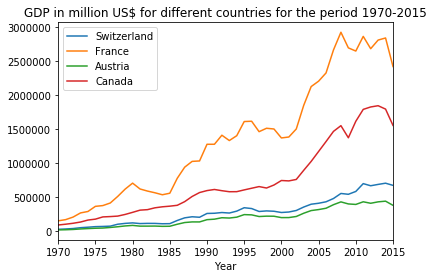

In [11]:
select_switzerland = df_useful["GDP"]['Area']=='Switzerland'
select_france = df_useful["GDP"]['Area']=='France'
select_austria = df_useful["GDP"]['Area']=='Austria'
select_canada = df_useful["GDP"]['Area']=='Canada'
ax = df_useful["GDP"][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

For dissolute or new countries, we have some Nan values (before appearing or after dissolution) as in this next example :

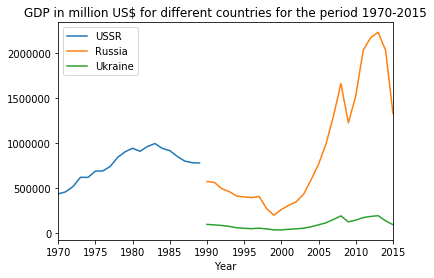

In [12]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>
We want to extract crops **harvested area**, **production**, **seed** and **yield** from the **"Crops production" dataset**. As all crops are not food crops, we request the [World crops database](https://world-crops.com/food-crops/) to **keep only the food crops**.

In [13]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [14]:
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

We check everything is fine by looking at samples for each of the new dataframes:

In [15]:
display('Crops Production', df_useful['Crops Production'].sample(5))

'Crops Production'

Area Code                              Area  \
182485          19  Bolivia (Plurinational State of)   
448395          98                           Croatia   
1348409        173                            Poland   
1214799        157                         Nicaragua   
1542582        277                       South Sudan   

                                  Item  Year    Unit     Value  
182485                       Peas, dry  2009  tonnes    4135.0  
448395         Fruit excl Melons,Total  2004  tonnes  504269.0  
1348409                       Chestnut  1986  tonnes       NaN  
1214799              Fruit, citrus nes  2002  tonnes    1100.0  
1542582  Broad beans, horse beans, dry  2012  tonnes       NaN

We also make some plots to have a first understanding of the dataset:

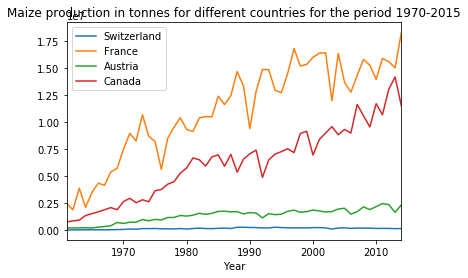

In [16]:
select_Maize = df_useful['Crops Production']['Item']=='Maize'
maize_df = df_useful['Crops Production'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize production in tonnes for different countries for the period 1970-2015')

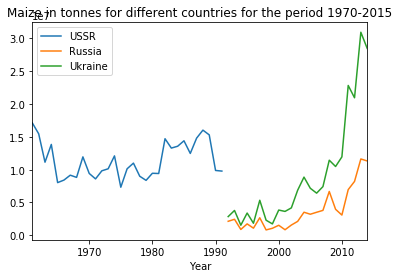

In [17]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize in tonnes for different countries for the period 1970-2015')

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

We want to extract **stocks production** from the **"Livestock production" dataset**. Again, we drop the columns that are useless for us and have a first look of the data with a sample and some plots.

In [18]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'
df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [19]:
display(df_useful['Livestock production'].sample(5))

Area Code                       Area                  Item  Year  \
26748         214  China, Taiwan Province of               Turkeys  1985   
35231          55                   Dominica  Cattle and Buffaloes  2001   
123964        234                    Uruguay       Sheep and Goats  1979   
78607         144                 Mozambique       Sheep and Goats  1985   
85000         159                    Nigeria                 Sheep  1982   

             Unit       Value  
26748   1000 Head       597.0  
35231        Head     13400.0  
123964       Head  17245008.0  
78607        Head    675000.0  
85000        Head   8943000.0

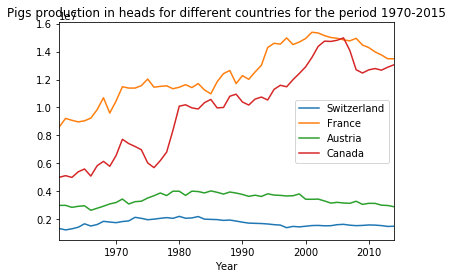

In [20]:
select_pigs = df_useful['Livestock production']['Item']=='Pigs'
pigs_df = df_useful['Livestock production'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

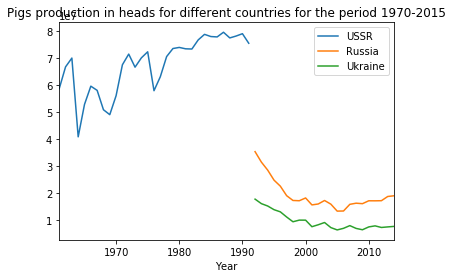

In [21]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>
Now, we extract **import and export quantities** from the **"Live animals trade" and "Crops trade" datasets**, having again some samples and some plots.

In [22]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [23]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code               Area              Item  Year       Unit  \
49              2        Afghanistan            Cattle  2010       Head   
436193        207           Suriname            Horses  1986       Head   
64772          26  Brunei Darussalam  Animals live nes  1968       Head   
638452       5706     European Union          Chickens  2013  1000 Head   
116097         45            Comoros            Cattle  1989       Head   

           Value  
49         454.0  
436193       NaN  
64772        0.0  
638452  968668.0  
116097       0.0

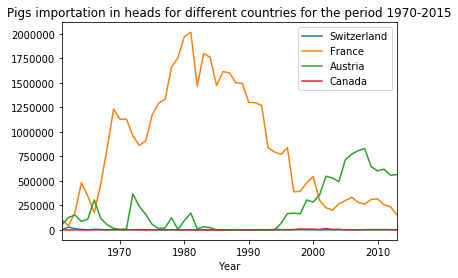

In [24]:
select_pigs = df_useful['Live animals import quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals import quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs importation in heads for different countries for the period 1970-2015')

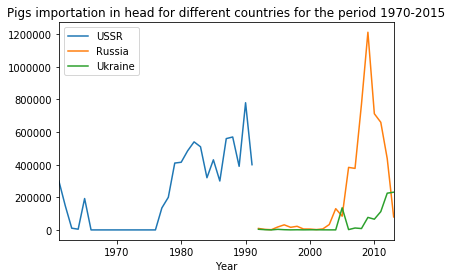

In [25]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs importation in head for different countries for the period 1970-2015')

In [26]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code          Area      Item  Year       Unit  Value
297478        138        Mexico  Beehives  1976         No    NaN
351190        166        Panama  Beehives  1999         No    NaN
583631       5302  Eastern Asia  Beehives  1975         No    NaN
289552        134         Malta    Cattle  2000       Head    0.0
569700       5206     Caribbean     Ducks  2004  1000 Head    NaN

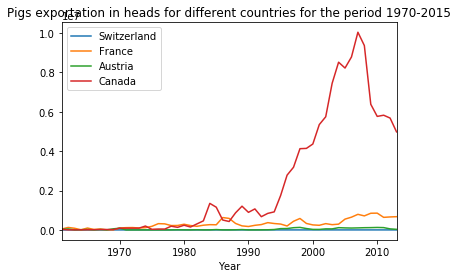

In [27]:
select_pigs = df_useful['Live animals export quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals export quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

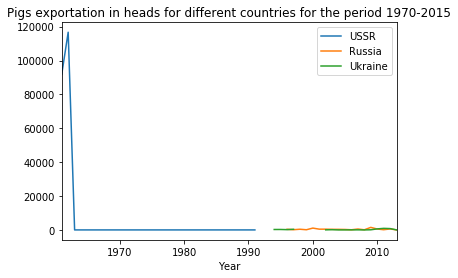

In [28]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

In [29]:
selection_import_quantities = df['Food trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Food trade']["Element"] == 'Export Quantity'

df_useful['Food import quantities'] = df['Food trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Food export quantities'] = df['Food trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [30]:
display(df_useful['Food import quantities'].sample(5))

Area Code                Area                    Item  Year    Unit  \
9928374         211         Switzerland                  Ginger  1983  tonnes   
12288773       5105      Western Africa            Meat, cattle  1997  tonnes   
1024355          23              Belize  Peaches and nectarines  1979  tonnes   
8254407         174            Portugal  Chocolate products nes  1964  tonnes   
13152199       5304  South-Eastern Asia                 Tobacco  2005  tonnes   

             Value  
9928374        0.0  
12288773    8646.0  
1024355        NaN  
8254407       57.0  
13152199  297006.0

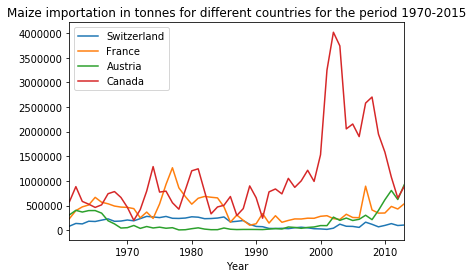

In [31]:
select_Maize = df_useful['Food import quantities']['Item']=='Maize'
maize_df = df_useful['Food import quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

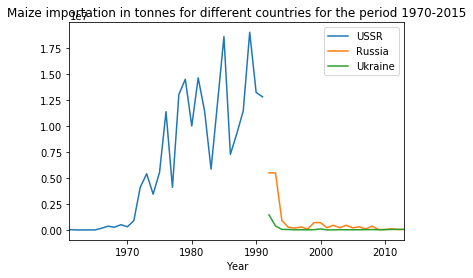

In [32]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

In [33]:
display(df_useful['Food export quantities'].sample(5))

Area Code                                Area  \
11194285        236  Venezuela (Bolivarian Republic of)   
7379039         157                           Nicaragua   
6760632         141                            Mongolia   
12538494       5204                     Central America   
8284172         174                            Portugal   

                                                Item  Year    Unit    Value  
11194285                            Oil, palm kernel  2005  tonnes      1.0  
7379039   Milk, products of natural constituents nes  1986  tonnes      NaN  
6760632                                   Other Meat  2006  tonnes   8818.0  
12538494                   Grease incl. lanolin wool  1982  tonnes     66.0  
8284172                        Milk, whole fresh cow  1996  tonnes  61842.0

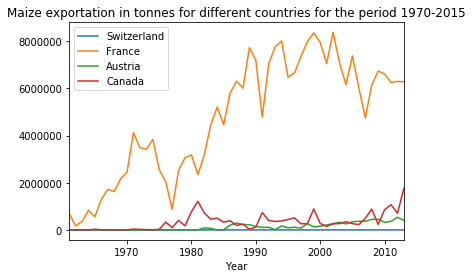

In [34]:
select_Maize = df_useful['Food export quantities']['Item']=='Maize'
maize_df = df_useful['Food export quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

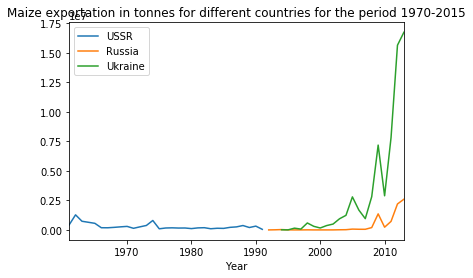

In [35]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

The **"Consumer price indices" dataset** contains **monthly data**. In order to have a **uniform dataframe**, and as other dataframes have **yearly data**, we will group it by (Country, Year) and compute the monthly mean for every year. Then we add a column to show the relative change in CPI, as this is what measures inflation, according to the following formula:

$$\frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}$$

In [36]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area','Year','Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

In [37]:

#We calculate the relative change in CPI for each year relative to last years CPI - this indicates yearly inflation. The first year in each area is set to 0.


df_useful['Consumer price indices']['Value'] = np.where(df_useful['Consumer price indices']['Area'] == df_useful['Consumer price indices']['Area'].shift(1),
         ((df_useful['Consumer price indices']['Value'] - df_useful['Consumer price indices']['Value'].shift(1))/df_useful['Consumer price indices']['Value'].shift(1)) * 100, 0)




In [38]:
display(df_useful['Consumer price indices'].head(5))

Area  Year      Value
0  Afghanistan  2004   0.000000
1  Afghanistan  2005  11.606340
2  Afghanistan  2006   7.254896
3  Afghanistan  2007   8.482889
4  Afghanistan  2008  30.554940

With samples and plots, we remark that this dataset **only starts in 2000** wheareas other ones start in 1970.

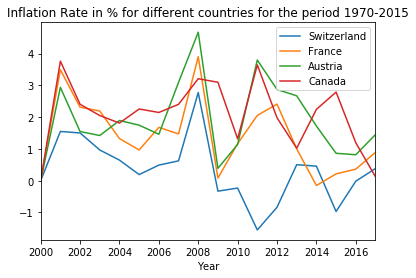

In [39]:
select_switzerland = df_useful['Consumer price indices']['Area']=='Switzerland'
select_france = df_useful['Consumer price indices']['Area']=='France'
select_austria = df_useful['Consumer price indices']['Area']=='Austria'
select_canada = df_useful['Consumer price indices']['Area']=='Canada'
ax = df_useful['Consumer price indices'][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful['Consumer price indices'][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

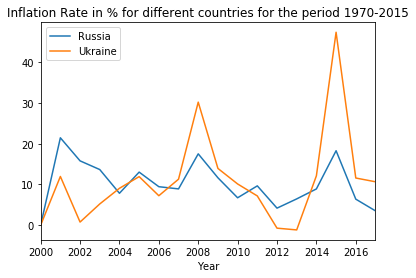

In [40]:
select_russia = df_useful["Consumer price indices"]['Area']=='Russian Federation'
select_ukraine = df_useful["Consumer price indices"]['Area']=='Ukraine'
ax = df_useful["Consumer price indices"][select_russia].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["Consumer price indices"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(['Russia', 'Ukraine'])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

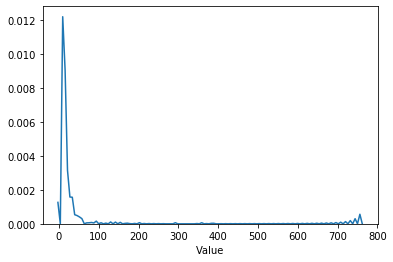

In [41]:
_ = sns.distplot(abs(df_useful["Consumer price indices"]["Value"]), rug=False, hist=False)

In [42]:
#looking at the cases where food prices increased over 100% during one year
df_useful["Consumer price indices"].loc[df_useful["Consumer price indices"]["Value"] > 100]

Area  Year       Value
55                                Angola  2001  152.561015
56                                Angola  2002  108.897433
851     Democratic Republic of the Congo  2001  359.936605
1280                              Guinea  2010  292.596028
2636               Sao Tome and Principe  2014  759.321212
2801                     Solomon Islands  2012  203.559117
2833                         South Sudan  2016  386.378414
2834                         South Sudan  2017  130.056890
3283  Venezuela (Bolivarian Republic of)  2015  171.224360
3284  Venezuela (Bolivarian Republic of)  2016  142.586732

It seems that the formula calculating food price inflation is actually correct. These are realistic cases where the price increased by over 100% in the span of a year. 

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the **areas which are real countries** are exactely the ones with an "Area Code" below $5000$ but not in $[261, 269]$.

In [43]:
#remove Area code >= 5000 or in [261, 269] (EU)
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<261 
        selection_countries = selection_countries | (df_useful[df_name]['Area Code']>269)
        selection_countries = selection_countries & (df_useful[df_name]['Area Code']<5000)
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code                    Area  Year        Value
391142        185      Russian Federation  1986          NaN
254372        113              Kyrgyzstan  1980          NaN
209524         95                Honduras  1974  1234.144388
66392         239  British Virgin Islands  1993   236.160000
132412         51          Czechoslovakia  2011          NaN

Removing areas which are not countries in Crops Production


Area Code                              Area  \
1443228        188             Saint Kitts and Nevis   
422792          48                        Costa Rica   
1512140        198                          Slovenia   
1834119        237                          Viet Nam   
177400          19  Bolivia (Plurinational State of)   

                                 Item  Year    Unit    Value  
1443228   Chillies and peppers, green  2000  tonnes     32.0  
422792               Fruit, fresh nes  1982  tonnes  29600.0  
1512140        Cucumbers and gherkins  2013  tonnes   4480.0  
1834119           Pepper (piper spp.)  1962  tonnes    450.0  
177400   Cabbages and other brassicas  1989  tonnes  14210.0

Removing areas which are not countries in Livestock production


Area Code                              Area             Item  Year  \
53065          93                             Haiti           Horses  1995   
114843        176                       Timor-Leste  Sheep and Goats  1988   
100008        190         Saint Pierre and Miquelon    Poultry Birds  1985   
100166        191  Saint Vincent and the Grenadines           Cattle  2005   
49166          87                        Guadeloupe            Goats  2000   

             Unit     Value  
53065        Head  480000.0  
114843       Head  111394.0  
100008  1000 Head       5.0  
100166       Head    5000.0  
49166        Head   33880.0

Removing areas which are not countries in Live animals import quantities


Area Code                      Area               Item  Year  \
491816        231  United States of America  Rabbits and hares  1985   
246562        112                    Jordan   Animals live nes  2006   
108198         41           China, mainland              Sheep  1987   
214368         97                   Hungary               Pigs  1983   
49630          17                   Bermuda            Turkeys  1989   

             Unit     Value  
491816  1000 Head       NaN  
246562       Head       0.0  
108198       Head    1923.0  
214368       Head  113967.0  
49630   1000 Head       NaN

Removing areas which are not countries in Live animals export quantities


Area Code      Area              Item  Year       Unit   Value
453259        216  Thailand          Chickens  2000  1000 Head  5095.0
96665         351     China  Animals live nes  2008       Head     0.0
466950        222   Tunisia             Mules  2005       Head     0.0
194630         86   Grenada          Chickens  1961  1000 Head     1.0
167670         66      Fiji             Goats  1978       Head    19.0

Removing areas which are not countries in Food import quantities


Area Code                            Area            Item  Year  \
8239477        173                          Poland    Poultry Meat  1980   
3017906        167                         Czechia  Beer of barley  1999   
7627020        299  Occupied Palestinian Territory    Beans, green  1980   
4803285         97                         Hungary         Sorghum  1972   
4922645        100                           India    Juice, grape  1976   

           Unit    Value  
8239477  tonnes   3514.0  
3017906  tonnes  17603.0  
7627020  tonnes      NaN  
4803285  tonnes      0.0  
4922645  tonnes      NaN

Removing areas which are not countries in Food export quantities


Area Code      Area                 Item  Year    Unit   Value
6672937         138    Mexico         Meat, rabbit  1973  tonnes     NaN
10145889        216  Thailand   Wine+Vermouth+Sim.  2002  tonnes  1153.0
1317069          20  Botswana  Groundnuts, shelled  1963  tonnes     0.0
6441683         133      Mali       Oth Citrus Frt  2011  tonnes     NaN
7569882         162    Norway               Garlic  1976  tonnes     0.0

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

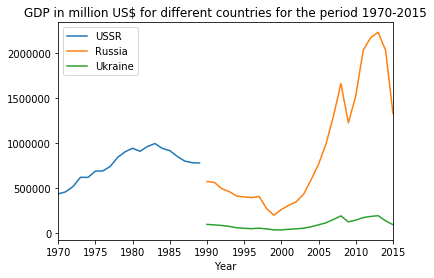

In [44]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

In order to **vizualize folium maps**, we need to **associate each country a value**. The geojson file that we use is not timestamped and **only countries that exist nowadays** are inside it. As **some countries has been dissolved** during the past 50 years, our folium maps won't be complete. For instance, we do not have any value for Ukraine from 1970 to 1989. Our idea to fix this issue is presented in the next paragraph.

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


Our idea is to **map the former country value to each of the current ones**. For instance in 1982, USSR GDP is around one trillion \\$. Therefore, if we associate (**only for folium map purposes**) this value to each current country that succeeded USSR, **all these countries will appear the same color** in the folium map, i.e. all the USSR area will appear the same color (and the good one).

In order to do so, one need to **identify which countries appeared and disappeared** from the dataset and **at which year**. Then we will use this result along with some **historical research** in our `visualise_world_data_folium` function ([1.E.a.](#1Ea)).

In [45]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
for year in sorted(list(countries_formation_years)):
    print (year, countries_formation_years[year])

1988 [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]
1989 [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')]
1990 [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+')]
1999 [('Kosovo', '+')]
2005 [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')]
2007 [('Sudan (former)', '-')]
2008 [('South Sudan', '+'), ('Sudan', '+')]
2012 [('Netherlands Antilles (former)', '-')]


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with **country names** and **normalizing** the features.

1.  
    5. 
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>
Some countries have **different names in the geojson file and in the dataset**. We first start by correcting them.

In [46]:
# Useful method for name correction
def correct_country_names(old_name, dic):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name

In [47]:
# Declaring dictionary with name correction
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea",
       'USSR':['Armenia',
               'Azerbaijan',
               'Belarus',
               'Estonia',
               'Georgia',
               'Kazakhstan',
               'Kyrgyzstan',
               'Latvia',
               'Lithuania',
               'Montenegro',
               'Republic of Moldova',
               'Russia',
               'Republic of Serbia',
               'Timor-Leste',
               'Turkmenistan',
               'Ukraine',
               'Uzbekistan'],
       'Ethiopia PDR':['Eritrea','Ethiopia'],
       'Yugoslav SFR':['Kosovo', 'Slovenia', 'Croatia','Macedonia', 'Bosnia and Herzegovina'],
       'Yemen Dem':['Yemen'],
       'Czechoslovakia':["Czech Republic", 'Slovakia'],
       'Netherlands Antilles (former)':['Curaçao', 'Sint Maarten (Dutch Part)'],
       'Sudan (former)':['South Sudan', 'Sudan']}

# Correcting each DataFrame
for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(lambda x : correct_country_names(x,dic))
    df_useful[df_name]=df_useful[df_name].explode('Area')

GDP
Crops Production
Livestock production
Live animals import quantities
Live animals export quantities
Food import quantities
Food export quantities
Consumer price indices


Then, we do a function that takes as input **a dataframe and a year** and produces the **corresponding folium map**. This function also h**andles dissolutions of countries** as suggested [before](#1Dbii).

In [48]:
import matplotlib.colors as colors

def visualise_world_data_folium(df, to_visualise, year, log=True,log2=False):
    
    if log2:
        log=False
    if log:
        log2=False
        
    # Defining color palette
    color_scale = sns.cubehelix_palette(9, start=.7, rot=-.9)
    
    # importing geojson and transforming to pandas
    geo_data=json.load(open("Scripts/Data/world-countries.json"))
    dics=geo_data['features']
    clean_dics=[]
    for country in dics:
        clean_dics.append({'Country':country['properties']['name'],
                          'geometry':country['geometry']})
    geo_df=pd.DataFrame(clean_dics)
    
    # cropping to df to data of interest
    df_visu=df[df.Year==year][['Area',to_visualise]]

    # Merging with geo data
    df_visu=geo_df.merge(df_visu,how='left',left_on='Country',right_on='Area')
    df_visu=df_visu.dropna()
    
    if log:
        df_visu['to_plot']=df_visu[to_visualise].apply(lambda x : np.log10(x))
        
    def log2_scale(x):
        out=np.sign(x)*np.log10(1+np.abs(x))
        return out
        
    if log2:
        df_visu['to_plot']=df_visu[to_visualise].apply(log2_scale)
    
    # creating bins for color scaling
    ma_value=df_visu['to_plot'].max()
    mi_value=df_visu['to_plot'].min()
    bins=np.linspace(mi_value,ma_value,8)
    
    # creating Json string for folium
    features=[]
    for _,row in df_visu.iterrows():
        color=np.digitize(row['to_plot'],bins)
        val=row[to_visualise]
        feature={
            'type' : 'Feature',
            
            'properties':{'name':row['Country'],
                          'value': '{:.2E}'.format(val),
                          'color':colors.to_hex(color_scale[color])},
            'geometry':row['geometry']
            }
        features.append(feature)
    
    def style(feature):
        
        if feature['properties']['value']==np.nan:
            print("lol")
            opac=0
        else:
            opac=0.8
        return {'fillOpacity':opac,
                   'weight':0.1,
                   'fillColor':feature['properties']['color']}
    geo_data=folium.GeoJson({'type':'FeatureCollection','features':features},style_function=style,tooltip=folium.features.GeoJsonTooltip(['name','value']))
    m=folium.Map()
    geo_data.add_to(m)
    return m

We can know use it to produce some maps. For instance, we plot below the map of GDP for the year 1985 (before dissolution of USSR) and 1995 (after).

In [49]:
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1985, True))
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1995, True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

Some of our features **seem to be right skewed**. At first glance it seems that they look like power laws.

For instance the distribution of GDP look a bit like a power law:

//anaconda3/envs/ada/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/ada/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


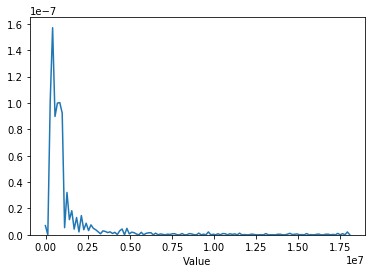

In [50]:
_ = sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

As we later want to train some Machine Learning models, we log those values so that their distribution look a bit **more like a normal distribution**.

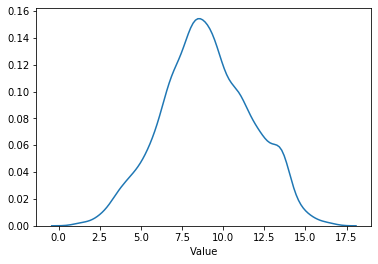

In [51]:
#looks better with log scale
_ = sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

The new distribution indeed looks better to train models on it.

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one **uniformized dataframe** `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation columns | CPI
    
In this uniformized dataframe, **a tuple `(Country, Year)` uniquely identifies a row**.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

The current dataframes have several rows for a given `(Country, Year)`. Each of this row correspond to one item. We would like to have a unique row for a given `(Country, Year)` and one column per item:

In [52]:
need_pivot = ['Crops Production',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Food import quantities',
              'Food export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_name, df_useful[df_name].sample(5))

'Crops Production'

Item                           Anise, badian, fennel, coriander Crops Production  \
Unit                                                                      tonnes   
Area                      Year                                                     
China, Taiwan Province of 1964                                               NaN   
Latvia                    1988                                               NaN   
Iran                      1972                                            8500.0   
Zambia                    1971                                               NaN   
Zimbabwe                  1983                                               NaN   

Item                           Apples Crops Production  \
Unit                                            tonnes   
Area                      Year                           
China, Taiwan Province of 1964                     NaN   
Latvia                    1988               5913000.0   
Iran                      1972                 89600.0   
Zambia                    1971                     NaN   
Zimbabwe                  1983                  5466.0   

Item                           Apricots Crops Production  \
Unit                                              tonnes   
Area                      Year                             
China, Taiwan Province of 1964                    6877.0   
Latvia                    1988                  213000.0   
Iran                      1972                   65000.0   
Zambia                    1971                       NaN   
Zimbabwe                  1983                      36.0   

Item                           Areca nuts Crops Production  \
Unit                                                tonnes   
Area                      Year                               
China, Taiwan Province of 1964                      4853.0   
Latvia                    1988                         NaN   
Iran                      1972                         NaN   
Zambia                    1971                         NaN   
Zimbabwe                  1983                         NaN   

Item                           Artichokes Crops Production  \
Unit                                                tonnes   
Area                      Year                               
China, Taiwan Province of 1964                         NaN   
Latvia                    1988                         NaN   
Iran                      1972                         NaN   
Zambia                    1971                         NaN   
Zimbabwe                  1983                         NaN   

Item                           Asparagus Crops Production  \
Unit                                               tonnes   
Area                      Year                              
China, Taiwan Province of 1964                      616.0   
Latvia                    1988                        NaN   
Iran                      1972                        NaN   
Zambia                    1971                        NaN   
Zimbabwe                  1983                        NaN   

Item                           Avocados Crops Production  \
Unit                                              tonnes   
Area                      Year                             
China, Taiwan Province of 1964                       NaN   
Latvia                    1988                       NaN   
Iran                      1972                       NaN   
Zambia                    1971                       NaN   
Zimbabwe                  1983                       NaN   

Item                           Bambara beans Crops Production  \
Unit                                                   tonnes   
Area                      Year                                  
China, Taiwan Province of 1964                            NaN   
Latvia                    1988                            NaN   
Iran                      1972                            NaN   
Zambia                    1

'Livestock production'

Item                  Animals live nes Livestock production  \
Unit                                                   Head   
Area             Year                                         
Estonia          2001                                   NaN   
Uruguay          1971                                   NaN   
Sweden           2004                                   NaN   
French Polynesia 2001                                   NaN   
Cook Islands     1969                                   NaN   

Item                  Asses Livestock production  \
Unit                                        Head   
Area             Year                              
Estonia          2001                        NaN   
Uruguay          1971                     1300.0   
Sweden           2004                        NaN   
French Polynesia 2001                        NaN   
Cook Islands     1969                        NaN   

Item                  Beehives Livestock production  \
Unit                        No Livestock production   
Area             Year                                 
Estonia          2001                       37000.0   
Uruguay          1971                       50000.0   
Sweden           2004                       54000.0   
French Polynesia 2001                        1230.0   
Cook Islands     1969                          10.0   

Item                  Buffaloes Livestock production  \
Unit                                            Head   
Area             Year                                  
Estonia          2001                            NaN   
Uruguay          1971                            NaN   
Sweden           2004                            NaN   
French Polynesia 2001                            NaN   
Cook Islands     1969                            NaN   

Item                  Camelids, other Livestock production  \
Unit                                                  Head   
Area             Year                                        
Estonia          2001                                  NaN   
Uruguay          1971                                  NaN   
Sweden           2004                                  NaN   
French Polynesia 2001                                  NaN   
Cook Islands     1969                                  NaN   

Item                  Camels Livestock production Cattle Livestock production  \
Unit                                         Head                        Head   
Area             Year                                                           
Estonia          2001                         NaN                    252800.0   
Uruguay          1971                         NaN                   8727000.0   
Sweden           2004                         NaN                   1628464.0   
French Polynesia 2001                         NaN                      8500.0   
Cook Islands     1969                         NaN                       180.0   

Item                  Cattle and Buffaloes Livestock production  \
Unit                                                       Head   
Area             Year                                             
Estonia          2001                                  252800.0   
Uruguay          1971                                 8727000.0   
Sweden           2004                                 1628464.0   
French Polynesia 2001                                    8500.0   
Cook Islands     1969                                     180.0   

Item                  Chickens Livestock production  \
Unit                                      1000 Head   
Area             Year                                 
Estonia          2001                        2318.0   
Uruguay          1971                        5300.0   
Sweden           2004                        6620.0   
French Polynesia 2001                         300.0   
Cook Islands     1969                          55.0   

Item                  Ducks Livestock production  ...  \
Unit   

'Live animals import quantities'

Item                        Animals live nes Live animals import quantities  \
Unit                                                                   Head   
Area                   Year                                                   
Republic of Moldova    1967                                             NaN   
Bosnia and Herzegovina 1966                                             NaN   
Rwanda                 1980                                             0.0   
Vietnam                1980                                             NaN   
Colombia               1988                                             NaN   

Item                        Asses Live animals import quantities  \
Unit                                                        Head   
Area                   Year                                        
Republic of Moldova    1967                                  NaN   
Bosnia and Herzegovina 1966                                  NaN   
Rwanda                 1980                                  NaN   
Vietnam                1980                                  NaN   
Colombia               1988                                  NaN   

Item                        Beehives Live animals import quantities  \
Unit                              No Live animals import quantities   
Area                   Year                                           
Republic of Moldova    1967                                     NaN   
Bosnia and Herzegovina 1966                                     NaN   
Rwanda                 1980                                     NaN   
Vietnam                1980                                     NaN   
Colombia               1988                                     NaN   

Item                        Bovine, Animals Live animals import quantities  \
Unit                                                                  Head   
Area                   Year                                                  
Republic of Moldova    1967                                       108200.0   
Bosnia and Herzegovina 1966                                         1579.0   
Rwanda                 1980                                           29.0   
Vietnam                1980                                            NaN   
Colombia               1988                                         3274.0   

Item                        Buffaloes Live animals import quantities  \
Unit                                                            Head   
Area                   Year                                            
Republic of Moldova    1967                                      NaN   
Bosnia and Herzegovina 1966                                      NaN   
Rwanda                 1980                                      NaN   
Vietnam                1980                                      NaN   
Colombia               1988                                      NaN   

Item                        Camelids, other Live animals import quantities  \
Unit                                                                  Head   
Area                   Year                                                  
Republic of Moldova    1967                                            NaN   
Bosnia and Herzegovina 1966                                            NaN   
Rwanda                 1980                                            NaN   
Vietnam                1980                                            NaN   
Colombia               1988                                            NaN   

Item                        Camels Live animals import quantities  \
Unit                                                         Head   
Area                   Year                                         
Republic of Moldova    1967                                   NaN   
Bosnia and Herzegovina 1966                                   NaN   
Rwanda                 1980                                   NaN   
Vietnam     

'Live animals export quantities'

Item                                  Animals live nes Live animals export quantities  \
Unit                                                                             Head   
Area                             Year                                                   
Mauritius                        1989                                             0.0   
Austria                          1986                                             NaN   
Saint Vincent and the Grenadines 1965                                             NaN   
Saint Lucia                      2006                                             NaN   
Guyana                           1975                                             NaN   

Item                                  Asses Live animals export quantities  \
Unit                                                                  Head   
Area                             Year                                        
Mauritius                        1989                                  NaN   
Austria                          1986                                  0.0   
Saint Vincent and the Grenadines 1965                                  0.0   
Saint Lucia                      2006                                  NaN   
Guyana                           1975                                  NaN   

Item                                  Beehives Live animals export quantities  \
Unit                                        No Live animals export quantities   
Area                             Year                                           
Mauritius                        1989                                     NaN   
Austria                          1986                                     NaN   
Saint Vincent and the Grenadines 1965                                     NaN   
Saint Lucia                      2006                                     NaN   
Guyana                           1975                                     NaN   

Item                                  Bovine, Animals Live animals export quantities  \
Unit                                                                            Head   
Area                             Year                                                  
Mauritius                        1989                                            0.0   
Austria                          1986                                        84933.0   
Saint Vincent and the Grenadines 1965                                            NaN   
Saint Lucia                      2006                                            0.0   
Guyana                           1975                                            0.0   

Item                                  Buffaloes Live animals export quantities  \
Unit                                                                      Head   
Area                             Year                                            
Mauritius                        1989                                      NaN   
Austria                          1986                                      NaN   
Saint Vincent and the Grenadines 1965                                      NaN   
Saint Lucia                      2006                                      NaN   
Guyana                           1975                                      NaN   

Item                                  Camelids, other Live animals export quantities  \
Unit                                                                            Head   
Area                             Year                                                  
Mauritius                        1989                                            NaN   
Austria                          1986                                            NaN   
Saint Vincent and the Grenadines 1965                                            NaN   
Saint Lucia                      2006                                            NaN   
Guyana                           19

'Food import quantities'

Item             Alfalfa meal and pellets Food import quantities  \
Unit                                                      tonnes   
Area        Year                                                   
Ivory Coast 1982                                             NaN   
Ethiopia    1975                                             NaN   
Myanmar     1993                                             NaN   
Portugal    1995                                         50659.0   
Cuba        1971                                             0.0   

Item             Almonds shelled Food import quantities  \
Unit                                             tonnes   
Area        Year                                          
Ivory Coast 1982                                    NaN   
Ethiopia    1975                                    NaN   
Myanmar     1993                                    NaN   
Portugal    1995                                  790.0   
Cuba        1971                                    NaN   

Item             Animal Oil+Fat+Grs Food import quantities  \
Unit                                                tonnes   
Area        Year                                             
Ivory Coast 1982                                     260.0   
Ethiopia    1975                                     531.0   
Myanmar     1993                                       0.0   
Portugal    1995                                    4563.0   
Cuba        1971                                   25762.0   

Item             Animal Vegetable Oil Food import quantities  \
Unit                                                  tonnes   
Area        Year                                               
Ivory Coast 1982                                      4801.0   
Ethiopia    1975                                      1418.0   
Myanmar     1993                                    181400.0   
Portugal    1995                                    128385.0   
Cuba        1971                                     93524.0   

Item             Animal fats Food import quantities  \
Unit                                         tonnes   
Area        Year                                      
Ivory Coast 1982                              260.0   
Ethiopia    1975                              531.0   
Myanmar     1993                                0.0   
Portugal    1995                             4563.0   
Cuba        1971                            25762.0   

Item             Anise, badian, fennel, coriander Food import quantities  \
Unit                                                              tonnes   
Area        Year                                                           
Ivory Coast 1982                                                NaN        
Ethiopia    1975                                                0.0        
Myanmar     1993                                              200.0        
Portugal    1995                                              195.0        
Cuba        1971                                                NaN        

Item             Apples Food import quantities  \
Unit                                    tonnes   
Area        Year                                 
Ivory Coast 1982                        1948.0   
Ethiopia    1975                          72.0   
Myanmar     1993                           0.0   
Portugal    1995                       57365.0   
Cuba        1971                           0.0   

Item             Apricots Food import quantities  \
Unit                                      tonnes   
Area        Year                                   
Ivory Coast 1982                             NaN   
Ethiopia    1975                             NaN   
Myanmar     1993                             NaN   
Portugal    1995                           864.0   
Cuba        1971                             NaN   

Item             Apricots, dry Food import quantities  \
Unit                                           

'Food export quantities'

Item                 Alfalfa meal and pellets Food export quantities  \
Unit                                                          tonnes   
Area            Year                                                   
Solomon Islands 1980                                             NaN   
Oman            1975                                             NaN   
Barbados        2008                                             NaN   
Niue            1989                                             NaN   
Slovakia        2011                                           320.0   

Item                 Almonds shelled Food export quantities  \
Unit                                                 tonnes   
Area            Year                                          
Solomon Islands 1980                                    NaN   
Oman            1975                                    NaN   
Barbados        2008                                    0.0   
Niue            1989                                    NaN   
Slovakia        2011                                  488.0   

Item                 Animal Oil+Fat+Grs Food export quantities  \
Unit                                                    tonnes   
Area            Year                                             
Solomon Islands 1980                                       NaN   
Oman            1975                                       NaN   
Barbados        2008                                       0.0   
Niue            1989                                       NaN   
Slovakia        2011                                   12141.0   

Item                 Animal Vegetable Oil Food export quantities  \
Unit                                                      tonnes   
Area            Year                                               
Solomon Islands 1980                                     15649.0   
Oman            1975                                         0.0   
Barbados        2008                                      2958.0   
Niue            1989                                         0.0   
Slovakia        2011                                     83170.0   

Item                 Animal fats Food export quantities  \
Unit                                             tonnes   
Area            Year                                      
Solomon Islands 1980                                NaN   
Oman            1975                                NaN   
Barbados        2008                                0.0   
Niue            1989                                NaN   
Slovakia        2011                            12141.0   

Item                 Anise, badian, fennel, coriander Food export quantities  \
Unit                                                                  tonnes   
Area            Year                                                           
Solomon Islands 1980                                                NaN        
Oman            1975                                                0.0        
Barbados        2008                                                0.0        
Niue            1989                                                NaN        
Slovakia        2011                                               63.0        

Item                 Apples Food export quantities  \
Unit                                        tonnes   
Area            Year                                 
Solomon Islands 1980                           NaN   
Oman            1975                           0.0   
Barbados        2008                           1.0   
Niue            1989                           NaN   
Slovakia        2011                       16036.0   

Item                 Apricots Food export quantities  \
Unit                                          tonnes   
Area            Year                                   
Solomon Islands 1980                             NaN   
Oman            1975                             NaN   
Barbados        2

Some **Nan values** have appeared. After some analysis, we have conclude to replace those Nan values by zeros. Indeed, it seems that those Nan values means that the value were very low and not significant to be measured.

In [53]:
# Deal with the NaN that appeared
for df_name in df_useful :
    if df_name != "GDP":
        for column in list(df_useful[df_name]):
            if column not in ['Area', 'Year']:
                df_useful[df_name][column].fillna(0, inplace=True)

In [54]:
#removing the multiindex, so that merge is clean with GDP and CPI
for df_name in need_pivot :
    df_useful[df_name].columns = [' '.join([str(_) for _ in v]) for v in df_useful[df_name].columns.values]
    display(df_useful[df_name].sample(5))
    

Anise, badian, fennel, coriander Crops Production tonnes  \
Area     Year                                                             
Nauru    1996                                                0.0          
Cambodia 1997                                                0.0          
Spain    1984                                             3236.0          
Kenya    2014                                               81.0          
Cuba     2001                                                0.0          

               Apples Crops Production tonnes  \
Area     Year                                   
Nauru    1996                             0.0   
Cambodia 1997                             0.0   
Spain    1984                       1028300.0   
Kenya    2014                           606.0   
Cuba     2001                             0.0   

               Apricots Crops Production tonnes  \
Area     Year                                     
Nauru    1996                               0.0   
Cambodia 1997                               0.0   
Spain    1984                          208100.0   
Kenya    2014                              74.0   
Cuba     2001                               0.0   

               Areca nuts Crops Production tonnes  \
Area     Year                                       
Nauru    1996                                 0.0   
Cambodia 1997                                 0.0   
Spain    1984                                 0.0   
Kenya    2014                               113.0   
Cuba     2001                                 0.0   

               Artichokes Crops Production tonnes  \
Area     Year                                       
Nauru    1996                                 0.0   
Cambodia 1997                                 0.0   
Spain    1984                            289057.0   
Kenya    2014                                30.0   
Cuba     2001                                 0.0   

               Asparagus Crops Production tonnes  \
Area     Year                                      
Nauru    1996                                0.0   
Cambodia 1997                                0.0   
Spain    1984                            54672.0   
Kenya    2014                              120.0   
Cuba     2001                                0.0   

               Avocados Crops Production tonnes  \
Area     Year                                     
Nauru    1996                               0.0   
Cambodia 1997                               0.0   
Spain    1984                           24549.0   
Kenya    2014                          218692.0   
Cuba     2001                            7500.0   

               Bambara beans Crops Production tonnes  \
Area     Year                                          
Nauru    1996                                    0.0   
Cambodia 1997                                    0.0   
Spain    1984                                    0.0   
Kenya    2014                                    0.0   
Cuba     2001                                    0.0   

               Bananas Crops Production tonnes  \
Area     Year                                    
Nauru    1996                              0.0   
Cambodia 1997                         145000.0   
Spain    1984                         439175.0   
Kenya    2014                        1644634.0   
Cuba     2001                         318062.0   

               Barley Crops Production tonnes  ...  \
Area     Year                                  ...   
Nauru    1996                             0.0  ...   
Cambodia 1997                             0.0  ...   
Spain    1984                      10789100.0  ...   
Kenya    2014                         65402.0  ...   
Cuba     2001                             0.0  ...   

               Sweet potatoes Crops Production tonnes  \
Area     Year                                           
Nauru    1996                                     0.0   
Cambodia 1997             

Animals live nes Livestock production Head  \
Area                         Year                                               
Indonesia                    1991                                         0.0   
United States Virgin Islands 2001                                         0.0   
Mexico                       1993                                         0.0   
Myanmar                      1980                                         0.0   
Mauritius                    1988                                         0.0   

                                   Asses Livestock production Head  \
Area                         Year                                    
Indonesia                    1991                              0.0   
United States Virgin Islands 2001                             56.0   
Mexico                       1993                        3190000.0   
Myanmar                      1980                              0.0   
Mauritius                    1988                             60.0   

                                   Beehives Livestock production No Livestock production  \
Area                         Year                                                          
Indonesia                    1991                                                0.0       
United States Virgin Islands 2001                                                0.0       
Mexico                       1993                                          2150000.0       
Myanmar                      1980                                              400.0       
Mauritius                    1988                                                0.0       

                                   Buffaloes Livestock production Head  \
Area                         Year                                        
Indonesia                    1991                            3310682.0   
United States Virgin Islands 2001                                  0.0   
Mexico                       1993                                  0.0   
Myanmar                      1980                            1901000.0   
Mauritius                    1988                                 25.0   

                                   Camelids, other Livestock production Head  \
Area                         Year                                              
Indonesia                    1991                                        0.0   
United States Virgin Islands 2001                                        0.0   
Mexico                       1993                                        0.0   
Myanmar                      1980                                        0.0   
Mauritius                    1988                                        0.0   

                                   Camels Livestock production Head  \
Area                         Year                                     
Indonesia                    1991                               0.0   
United States Virgin Islands 2001                               0.0   
Mexico                       1993                               0.0   
Myanmar                      1980                               0.0   
Mauritius                    1988                               0.0   

                                   Cattle Livestock production Head  \
Area                         Year                                     
Indonesia                    1991                        10667000.0   
United States Virgin Islands 2001                            8000.0   
Mexico                       1993                        30649008.0   
Myanmar                      1980                         8531000.0   
Mauritius                    1988                           33000.0   

                                   Cattle and Buffaloes Livestock production Head  \
Area                         Year                                                   
Indonesia                    1991                                      13977682.0   


Animals live nes Live animals import quantities Head  \
Area       Year                                                         
Lithuania  1988                                                0.0      
Uganda     1964                                                0.0      
Malawi     2008                                                0.0      
Morocco    1971                                                0.0      
Uzbekistan 1979                                                0.0      

                 Asses Live animals import quantities Head  \
Area       Year                                              
Lithuania  1988                                        0.0   
Uganda     1964                                        0.0   
Malawi     2008                                        0.0   
Morocco    1971                                       40.0   
Uzbekistan 1979                                        0.0   

                 Beehives Live animals import quantities No Live animals import quantities  \
Area       Year                                                                              
Lithuania  1988                                                0.0                           
Uganda     1964                                                0.0                           
Malawi     2008                                                0.0                           
Morocco    1971                                                0.0                           
Uzbekistan 1979                                                0.0                           

                 Bovine, Animals Live animals import quantities Head  \
Area       Year                                                        
Lithuania  1988                                           183000.0     
Uganda     1964                                            17000.0     
Malawi     2008                                              646.0     
Morocco    1971                                              663.0     
Uzbekistan 1979                                           135000.0     

                 Buffaloes Live animals import quantities Head  \
Area       Year                                                  
Lithuania  1988                                            0.0   
Uganda     1964                                            0.0   
Malawi     2008                                            0.0   
Morocco    1971                                            0.0   
Uzbekistan 1979                                            0.0   

                 Camelids, other Live animals import quantities Head  \
Area       Year                                                        
Lithuania  1988                                                0.0     
Uganda     1964                                                0.0     
Malawi     2008                                                0.0     
Morocco    1971                                                0.0     
Uzbekistan 1979                                                0.0     

                 Camels Live animals import quantities Head  \
Area       Year                                               
Lithuania  1988                                         0.0   
Uganda     1964                                         0.0   
Malawi     2008                                         0.0   
Morocco    1971                                         0.0   
Uzbekistan 1979                                         0.0   

                 Cattle Live animals import quantities Head  \
Area       Year                                               
Lithuania  1988                                    183000.0   
Uganda     1964                                     17000.0   
Malawi     2008                                       646.0   
Morocco    1971                                       663.0   
Uzbekistan 1979                                    135000.0   

                 Chickens Live animals import quantiti

Animals live nes Live animals export quantities Head  \
Area                     Year                                                         
Nicaragua                2008                                                0.0      
Mexico                   2008                                                0.0      
Suriname                 2012                                                0.0      
Jordan                   1981                                                0.0      
United States of America 1974                                                0.0      

                               Asses Live animals export quantities Head  \
Area                     Year                                              
Nicaragua                2008                                        0.0   
Mexico                   2008                                        0.0   
Suriname                 2012                                        0.0   
Jordan                   1981                                        0.0   
United States of America 1974                                        0.0   

                               Beehives Live animals export quantities No Live animals export quantities  \
Area                     Year                                                                              
Nicaragua                2008                                                0.0                           
Mexico                   2008                                                1.0                           
Suriname                 2012                                                0.0                           
Jordan                   1981                                                0.0                           
United States of America 1974                                                0.0                           

                               Bovine, Animals Live animals export quantities Head  \
Area                     Year                                                        
Nicaragua                2008                                            23224.0     
Mexico                   2008                                           737662.0     
Suriname                 2012                                                0.0     
Jordan                   1981                                               49.0     
United States of America 1974                                           204695.0     

                               Buffaloes Live animals export quantities Head  \
Area                     Year                                                  
Nicaragua                2008                                            0.0   
Mexico                   2008                                            0.0   
Suriname                 2012                                            0.0   
Jordan                   1981                                            0.0   
United States of America 1974                                            0.0   

                               Camelids, other Live animals export quantities Head  \
Area                     Year                                                        
Nicaragua                2008                                                0.0     
Mexico                   2008                                                0.0     
Suriname                 2012                                                0.0     
Jordan                   1981                                                0.0     
United States of America 1974                                                0.0     

                               Camels Live animals export quantities Head  \
Area                     Year                                               
Nicaragua                2008                                         0.0   
Mexico                   2008                                         0.0   
Suriname                 2012                           

Alfalfa meal and pellets Food import quantities tonnes  \
Area       Year                                                           
Algeria    1968                                              135.0        
Zambia     2010                                                4.0        
Bulgaria   2003                                                0.0        
Kazakhstan 1978                                                0.0        
Finland    1974                                                0.0        

                 Almonds shelled Food import quantities tonnes  \
Area       Year                                                  
Algeria    1968                                          100.0   
Zambia     2010                                            3.0   
Bulgaria   2003                                          892.0   
Kazakhstan 1978                                         7975.0   
Finland    1974                                            0.0   

                 Animal Oil+Fat+Grs Food import quantities tonnes  \
Area       Year                                                     
Algeria    1968                                           13559.0   
Zambia     2010                                            1550.0   
Bulgaria   2003                                            8239.0   
Kazakhstan 1978                                           58100.0   
Finland    1974                                            2627.0   

                 Animal Vegetable Oil Food import quantities tonnes  \
Area       Year                                                       
Algeria    1968                                            57193.0    
Zambia     2010                                            81943.0    
Bulgaria   2003                                            66439.0    
Kazakhstan 1978                                           252942.0    
Finland    1974                                            17276.0    

                 Animal fats Food import quantities tonnes  \
Area       Year                                              
Algeria    1968                                    13559.0   
Zambia     2010                                     1550.0   
Bulgaria   2003                                     8239.0   
Kazakhstan 1978                                    58100.0   
Finland    1974                                     2627.0   

                 Anise, badian, fennel, coriander Food import quantities tonnes  \
Area       Year                                                                   
Algeria    1968                                              720.0                
Zambia     2010                                                8.0                
Bulgaria   2003                                              440.0                
Kazakhstan 1978                                                0.0                
Finland    1974                                              102.0                

                 Apples Food import quantities tonnes  \
Area       Year                                         
Algeria    1968                                   0.0   
Zambia     2010                                6006.0   
Bulgaria   2003                               31962.0   
Kazakhstan 1978                              330756.0   
Finland    1974                               43885.0   

                 Apricots Food import quantities tonnes  \
Area       Year                                           
Algeria    1968                                     0.0   
Zambia     2010                                     3.0   
Bulgaria   2003                                   245.0   
Kazakhstan 1978                                     0.0   
Finland    1974                                    20.0   

                 Apricots, dry Food import quantities tonnes  \
Area       Year                                                
Algeria    1968                                          0.0   
Zambia     2010        

Alfalfa meal and pellets Food export quantities tonnes  \
Area                Year                                                           
Trinidad and Tobago 1973                                                0.0        
Malawi              2010                                                0.0        
Finland             1989                                                0.0        
Netherlands         1984                                            25020.0        
Denmark             1976                                           114766.0        

                          Almonds shelled Food export quantities tonnes  \
Area                Year                                                  
Trinidad and Tobago 1973                                            0.0   
Malawi              2010                                            0.0   
Finland             1989                                            5.0   
Netherlands         1984                                          370.0   
Denmark             1976                                           10.0   

                          Animal Oil+Fat+Grs Food export quantities tonnes  \
Area                Year                                                     
Trinidad and Tobago 1973                                               0.0   
Malawi              2010                                               0.0   
Finland             1989                                            1668.0   
Netherlands         1984                                           90800.0   
Denmark             1976                                           19951.0   

                          Animal Vegetable Oil Food export quantities tonnes  \
Area                Year                                                       
Trinidad and Tobago 1973                                              278.0    
Malawi              2010                                             1388.0    
Finland             1989                                            39155.0    
Netherlands         1984                                          1271778.0    
Denmark             1976                                            79184.0    

                          Animal fats Food export quantities tonnes  \
Area                Year                                              
Trinidad and Tobago 1973                                        0.0   
Malawi              2010                                        0.0   
Finland             1989                                     1668.0   
Netherlands         1984                                    90800.0   
Denmark             1976                                    19951.0   

                          Anise, badian, fennel, coriander Food export quantities tonnes  \
Area                Year                                                                   
Trinidad and Tobago 1973                                                0.0                
Malawi              2010                                               71.0                
Finland             1989                                                0.0                
Netherlands         1984                                             6132.0                
Denmark             1976                                              215.0                

                          Apples Food export quantities tonnes  \
Area                Year                                         
Trinidad and Tobago 1973                                  15.0   
Malawi              2010                                   0.0   
Finland             1989                                  20.0   
Netherlands         1984                              153255.0   
Denmark             1976                               16905.0   

                          Apricots Food export quantities tonnes  \
Area                Year                                           
Trinidad and Tobago 1973                                     

#### 1.F.b. Dealing with unit discrepencies  <a name="1Fb"></a>
Before merging dataframes, we notice two different units in the dataframes dealing with livestock datas: "1000 Heads" and "Heads". Let's have a look at the following dataframes:
* Livestock production
* Live animals import quantities
* Live animals export quantities


In [55]:
#Select dfs that correspond to livestock data
livestock_dfs={s:df_useful[s] for s in df_useful.keys() if 'live' in s.lower()}

Before handling the data, we want to know if the columns presented in "1000 Heads" are also presented in "Heads"

In [56]:
# Useful method to remove words from string
def drop_words( s , w=1 , end=True):
    if end:
        return s.rsplit(' ',w)[0]
    else:
        return s.split(' ',w)[-1]
    

for key in livestock_dfs.keys():
    col=livestock_dfs[key].columns
    th_heads=[s for s in col if '1000 head' in s.lower()]
    heads=[s for s in col if '1000 head' not in s.lower()]
    shared=[s for s in th_heads if drop_words(s,2)+" Head" in heads]
    print('There are {} columns expressed in "1000 Heads" and {} columns expressed in "Head" in the dataframe {} and {} columns are expressed in both'
          .format(len(th_heads),len(heads),key,len(shared)))
    

There are 8 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Livestock production and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals import quantities and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals export quantities and 0 columns are expressed in both


In [57]:
def convert_1000H_to_head(df):
    
    # methods converting the columns expressed in "1000 Head" in "Head" and renaming them
    
    cols_to_convert=[col for col in df.columns if '1000 head' in col.lower()]
    df[cols_to_convert]=df[cols_to_convert]*1000
    new_cols=[drop_words(s,2)+' Head' for s in cols_to_convert]
    name_dic={old:new for old,new in zip(cols_to_convert,new_cols)}
    df=df.rename(columns=name_dic)
    return df

In [58]:
for key in livestock_dfs.keys():
    df_useful[key]=convert_1000H_to_head(df_useful[key])
    display(df_useful[key].head(1))

Animals live nes Livestock production Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Asses Livestock production Head  \
Area        Year                                    
Afghanistan 1961                        1300000.0   

                  Beehives Livestock production No Livestock production  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Buffaloes Livestock production Head  \
Area        Year                                        
Afghanistan 1961                                  0.0   

                  Camelids, other Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Camels Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          250000.0   

                  Cattle Livestock production Head  \
Area        Year                                     
Afghanistan 1961                         2900000.0   

                  Cattle and Buffaloes Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                       2900000.0   

                  Chickens Livestock production Head  \
Area        Year                                       
Afghanistan 1961                           4700000.0   

                  Ducks Livestock production Head  ...  \
Area        Year                                   ...   
Afghanistan 1961                              0.0  ...   

                  Horses Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          276841.0   

                  Mules Livestock production Head  \
Area        Year                                    
Afghanistan 1961                          20000.0   

                  Pigeons, other birds Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                             0.0   

                  Pigs Livestock production Head  \
Area        Year                                   
Afghanistan 1961                             0.0   

                  Poultry Birds Livestock production Head  \
Area        Year                                            
Afghanistan 1961                                4700000.0   

                  Rabbits and hares Livestock production Head  \
Area        Year                                                
Afghanistan 1961                                          0.0   

                  Rodents, other Livestock production Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Sheep Livestock production Head  \
Area        Year                                    
Afghanistan 1961                       18000000.0   

                  Sheep and Goats Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                 22200000.0   

                  Turkeys Livestock production Head  
Area        Year                                     
Afghanistan 1961                                0.0  

[1 rows x 22 columns]

Animals live nes Live animals import quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals import quantities No Live animals import quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals import quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals import quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals import quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals import quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals import quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals import quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals import quantiti

Animals live nes Live animals export quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals export quantities No Live animals export quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals export quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals export quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals export quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals export quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals export quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals export quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals export quantiti

#### 1.F.c. Merging everything  <a name="1Fc"></a>
We are now creating the uniformized dataframe `uni_df`. Each row corresponds to one tuple `(Country, Year)` so that we can later **group by country** or **year**. In addition to the country ("Area") and the "Year", the columns will either be an **economic feature ("GDP", "CPI")** or an **agricultural one (some crop harvested area, some livestock export quantity, ...)**. With this uniformized dataframe, we can later on **analyze correlations and links** between different feautures place and yearwise. This means we can measure a correlation of e.g. GDP with the production of a specific crop over all countries and all years.

In [59]:
uni_df = df_useful['GDP'].dropna()
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='left', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='left', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(0, inplace=True)
uni_df.sample(30)

Area  Year  (GDP, million $)  \
1596                  Cayman Islands  1990        929.885733   
1240               Brunei Darussalam  2002       6474.732994   
347                        Argentina  1995     279701.425370   
3668                          Guyana  2005       1315.438530   
5297                       Mauritius  1995       4091.954207   
790                          Belgium  1992     236048.888400   
4643                         Lebanon  2011      40075.621891   
2988                            Fiji  1995       1993.418467   
5544                      Montserrat  1986         46.271959   
9276             Republic of Moldova  1986     849684.731820   
1344                    Burkina Faso  2014      12596.195231   
9719                        Zimbabwe  1980       7147.660302   
4016                            Iraq  1985      12074.480925   
5679                         Myanmar  1983       6258.858779   
2792                     El Salvador  2009      20661.032789   
4998                        Malaysia  1972       5043.347486   
9200                         Belarus  1982     959947.826210   
6275  Occupied Palestinian Territory  1971        203.508476   
8272                        Thailand  1996     182738.308460   
5580                         Morocco  1976      11253.900173   
8131                     Switzerland  1973      47993.946857   
6539                Papua New Guinea  2005       7312.284812   
8583                    Turkmenistan  1999       3856.923077   
6212                         Nigeria  2000      74591.453569   
1658        Central African Republic  2006       1537.502785   
7636                        Slovakia  2010      89501.012916   
867                            Benin  1977        785.887967   
8740                         Ukraine  1992      81359.482323   
9262                     Timor-Leste  1985     914117.647060   
4078                         Ireland  2001     109118.149820   

      Anise, badian, fennel, coriander Crops Production tonnes  \
1596                                                0.0          
1240                                                0.0          
347                                              2611.0          
3668                                                0.0          
5297                                                0.0          
790                                                 0.0          
4643                                               89.0          
2988                                                0.0          
5544                                                0.0          
9276                                                0.0          
1344                                                0.0          
9719                                                0.0          
4016                                                0.0          
5679                                                0.0          
2792                                                0.0          
4998                                                0.0          
9200                                                0.0          
6275                                                0.0          
8272                                                0.0          
5580                                            11000.0          
8131                                                0.0          
6539                                                0.0          
8583                                                0.0          
6212                                                0.0          
1658                                                0.0          
7636                                              228.0          
867                                                 0.0          
8740                                             1200.0          
9262                                                0.0          
4078                                                0.0          



#### 1.G The last filter  <a name="1G"></a>

At the very beginning, when importing data for the crops production, we focused on the "food crops". It is very likely that the import and export dataframes contain more data than we have in the production dataframe. As we want, later, compare these data, we decide to keep only the crops and animals for which we have production,import and export data.  

Let's have a look!

In [60]:
import_cols=[col for col in uni_df.columns if 'import' in col.lower()]
export_cols=[col for col in uni_df.columns if 'export' in col.lower()]
prod_cols=[col for col in uni_df.columns if 'production' in col.lower()]
others=[col for col in uni_df.columns if 'production' not in col.lower() and 'export' not in col.lower() and 'import' not in col.lower()]
print('There are {} import columns, {} export columns,{} production columns and {} other.'.format(len(import_cols),len(export_cols),len(prod_cols),len(others)))

There are 472 import columns, 464 export columns,144 production columns and 4 other.


There is indeed much work to be done!

In [61]:
import_col_dic={drop_words(s,3):s for s in import_cols}
export_col_dic={drop_words(s,3):s for s in export_cols}
prod_col_dic={drop_words(s,3):s for s in prod_cols}

import_keys=list(import_col_dic.keys())
export_keys=list(export_col_dic.keys())
prod_keys=list(prod_col_dic.keys())

prod=set([])
imp=set([])
exp=set([])

for prod_feature in prod_keys:
    for imp_feature in import_keys:
        if prod_feature.lower()+" food" == imp_feature.lower() or prod_feature.lower()+" live animals" == imp_feature.lower():
            for exp_feature in export_keys:
                if prod_feature.lower()+" food" == exp_feature.lower() or prod_feature.lower()+" live animals" == exp_feature.lower():
                    prod.add(prod_feature)
                    imp.add(imp_feature)
                    exp.add(exp_feature)
prod=list(prod)
prod.sort()
exp=list(exp)
exp.sort()
imp=list(imp)
imp.sort()

print('We find {} columns present in import, export and production'.format(len(prod)))

import_cols=[import_col_dic[k] for k in imp]
export_cols=[export_col_dic[k] for k in exp]
prod_cols=[prod_col_dic[k] for k in prod]

cols_of_interest=others+import_cols+export_cols+prod_cols

We find 107 columns present in import, export and production


In [62]:
uni_df=uni_df[cols_of_interest]

In [63]:
import pickle
pickle.dump(uni_df,open("Scripts/Data/uni_df.pkl",'wb'))

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)      
                
    3. [Structure of international trade and historical context](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Consumer price indices](#2B), then study the [structure of international trade and historical context](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
For the next milestone, we will also produce some maps, showing for instance the production of a specific crop per country over the years. We have shown in previous parts that the dataset contains the necessary data and that we can handle the data in its size and plot maps.

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the **notion of food self-sufficiency**. We will use the **quantitative definition of the Food and Agriculture Organization (FAO)**. 
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know **whether a country produces all the food it needs or not**. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how **to which degree a country can satisfy to meet its internal consumption needs by production**. It describes the extent to which a country is able to **feed its population through its domestic food production**. We are interested in this measure since we think**it could be correlated** with the economic conditions of this country, particularly **price stability**. Price stability is defined in the next part.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following **formula** that gives us the **food self-sudfficiency as a percentage** :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

The following is a trial calculation of self-sufficiency. Refining which agriculutral products should go into this calculation still need to be done for next milestone. Indeed with our first calculations it seems that the self-sufficiency is always lower than 100% whereas this should not be the case.

In [64]:
def compute_self_suficiency(df,w=None):
    
    # From the unified dataframe df, compute the self sufficiency score for each year for each country
    # if a paramter of weights is given as a dict, the method returns the aggregated score.
    
    weights=w.copy()
    
    #Useful method to manipulate names
    def drop_words( s , w=1 , end=True):
        if end:
            return s.rsplit(' ',w)[0]
        else:
            return s.split(' ',w)[-1]
    
    df=df.set_index(['Area','Year'])
    
    #Getting the columns corresponding to import, export and production
    import_cols=[col for col in df.columns if 'import' in col.lower()]
    export_cols=[col for col in df.columns if 'export' in col.lower()]
    prod_cols=[col for col in df.columns if 'production' in col.lower()]
    
    #Initializing new dataframe
    scores=pd.DataFrame(index=df.index)
    
    #Generating scores
    for i,col in enumerate(import_cols):
        scores[drop_words(col,3)]=(df[prod_cols[i]]*100/(
                                    df[prod_cols[i]]+df[import_cols[i]]-df[export_cols[i]]))
    
    #If no weights, return scores without aggregate
    if weights==None:
        return scores
    
    features=[w for w in weights.keys()]
    temp=pd.DataFrame(index=df.index)
    
    #replacing na with 0 to avoid na aggregated scores
    scores=scores.fillna(0)
    
    #Selecting features of interest and multiplying them with their weight
    #Note: Some weights refer to the same score (eg 'Maize Crops Production tonnes' and 'Maize Food import quantities tonnes') to go around this problem, the scores referring to the same columns are sumed
    
    temp_dic={}#Will retain data untill complete and then turned into pandas DataFrame
    popped=[] #Will store the weights that are already taken care of because they reffered to the same columns as another weight already treated
    for feat in list(weights.keys()):
        if feat not in popped:
            w_agg={feat:weights[feat]}
            s=re.split(' Food| Live.*| Crops',feat)[0]
            s='^'+s
            w=weights[feat]

            for f in list(weights.keys()):
                if f!=feat and re.search(s,f) and s[1:]==re.split(' Food.*| Live.*| Crops.*',f)[0]:
                    w+=weights[f]
                    w_agg.update({f:weights[f]})
                    popped.append(f)
            cols=[c for c in scores.columns if re.split(' Food.*| Live.*| Crops.*',c)[0]==s[1:]]
            if len(cols)==0:
                print('\n {} NOT FOUND'.format(feat))
            else:
                print('{} weight : {} agg from: {}'.format(feat,w,w_agg))
                temp_df=scores[cols].copy()
                temp_df=temp_df.apply(lambda x: x*w)
                temp_dic.update(temp_df.to_dict())
            
    temp=pd.DataFrame(temp_dic)
    #Aggregating the scores
    scores=pd.DataFrame(temp.sum(axis=1),columns=['Agg'])
    
    return scores

#### 2.B. Consumer price indices  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Definition](#2Ba) 
    
        2. [Usage](#2Bb)      
        
##### 2.B.a. Definition  <a name="2Ba"></a>

**Consumer price indices (CPI)** are a way to measure the **changes of the average price level of goods**.
Typically a "basket of consumer goods and services" is used to calculate average consumer prices each year. Then, the relative change of these prices is used as a **measure of inflation or deflation over a period of time**. More technically, for a given item, the CPI is the ratio of the market basket for two different years. Global CPI is an average of sigle item CPI with **some standardized weights**. 
The FAO dataset includes the consumer prices, food indices. This means we have **information about countries food price stability over the years**.

##### 2.B.b. Usage  <a name="2Bb"></a>

The CPI has **many uses** and is often taken into consideration. For instance it is used for budget and pension revisions, monetary and economic policies, and economic analysis. It is a good indicator of relative price stability, which is essential for development and economic safety. The european central banks main objective is price stability in the euro-zone of keeping the consumer price index below a growth of 2% per year.  

**We will use the CPI** to answer the following questions: "Are prices more stables in more self-sufficient countries ?", "Is there a link between the CPI and other agricultural features ?" 

#### 2.C. Structure of international trade and historical context  <a name="2C"></a>


Our dataset contains data for the historical period **from 1970 to 2015**. In order to be able to correctly interpret the results we are going to see, we first made **a brief historical research** on this period. Listed below are important events of this period for which we think they have had a **significant influence on the agriculture and the economy**.

There was the Cold war from 1945 to 1990 with two economic superpowers (USA and USSR). The USSR had been dissolved in 1991.  The Japanese economic miracle occured from 1945 to 1990 and allowed Japan to come out of the disastrous state in which it was at the exit of the WW2 and become one of the worlds largest economies. There have been 2 big oil crises, in 1973 and 1979. There have been many wars (Middle East wars 1973-2000 e.g. Yom Kippur War 1973, Islamic Revolution in Iran 1979, Iran–Iraq war 1980-1988, Gulf war 1990-1991, Yugoslav wars 1991-2001...). We have **already seen some consequences of such events** by dealing with countries names in a previous section.

The **third Agricultural Revolution** (also known as Green revolution) occurs form 1960 to 1990 and improved agricultural productions thanks to fertilizers and chemicals.

The following public-domain image from [Wikimedia](https://commons.wikimedia.org/wiki/File:Imf-advanced-un-least-developed-2008.svg) represents developed countries (blue), developing ones (orange) and least developed ones (red) according to the United Nations and International Monetary Fund. We expect to see **similar results with our dataset (GDP)**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Imf-advanced-un-least-developed-2008.svg/1920px-Imf-advanced-un-least-developed-2008.svg.png">

The following image, also from [Wikimedia](https://commons.wikimedia.org/wiki/File:Cumulative_Current_Account_Balance.png) shows the **cumulative commercial balance** for the period 1980-2008. We also expect to see similar results with our dataset, but **there might be difference as we focus on agriculture**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Cumulative_Current_Account_Balance.png/800px-Cumulative_Current_Account_Balance.png">


In order to have an idea of the **international trade and economy structure**, we are interested in **GDP**: 

In [65]:
pivoted_GDP_df = uni_df[['Area','Year']]
pivoted_GDP_df["GDP"] = uni_df["(GDP, million $)"]
pivoted_GDP_df = pivoted_GDP_df.pivot_table(index='Year', columns='Area', values="GDP").dropna(axis=1)

//anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
pivoted_GDP_df.sample(5)

Area   Afghanistan       Albania        Algeria      Andorra         Angola  \
Year                                                                          
1981   3478.787916   2215.474766   44264.573122   492.189978    6693.017247   
1990   3621.600007   2146.815829   61751.375957  1302.006184   13661.852631   
1993   2664.399992   1700.549584   50846.930343  1274.297409   13468.134122   
1985   3321.900002   2324.414456   57866.207279   438.742504    9109.025236   
2013  21610.365221  12781.032867  209783.498220  3281.763085  136709.891900   

Area    Anguilla  Antigua and Barbuda      Argentina        Armenia  \
Year                                                                  
1981   13.988466           152.098678   84624.923051  906864.339720   
1990   75.601760           459.469059  153185.723200    2305.595682   
1993   92.100056           535.172767  256573.074880    1170.191219   
1985   26.916160           244.778860   95529.910653  914117.647060   
2013  281.992593          1195.885117  615684.614840   11121.464430   

Area        Aruba  ...  United Republic of Tanzania  United States of America  \
Year               ...                                                          
1981   312.733527  ...                 10777.051763                 3210900.0   
1990   764.887117  ...                  6999.982958                 5979600.0   
1993  1082.979708  ...                  6450.483491                 6878700.0   
1985   384.942825  ...                 11654.193282                 4346700.0   
2013  2581.564246  ...                 45489.358869                16691517.0   

Area       Uruguay     Uzbekistan     Vanuatu      Venezuela        Vietnam  \
Year                                                                          
1981  11880.159358  906864.339720  108.054073   77581.928605    1884.649559   
1990   9239.418920   14742.409843  171.483937   47036.422264    6471.744896   
1993  16568.270579   13771.281948  219.337073   58097.601868   13180.955663   
1985   5225.664528  914117.647060  132.567686   59963.312267    4797.100658   
2013  57531.208195   57157.151435  801.787556  371338.321700  171222.025390   

Area         Yemen        Zambia      Zimbabwe  
Year                                            
1981    407.919142   4016.122281   8599.426306  
1990   4036.181977   3794.810423  11737.766649  
1993   4782.199589   3273.507754   8773.067727  
1985    533.552674   2772.255858   7547.816615  
2013  34714.035088  28045.580084  13490.000000  

[5 rows x 209 columns]

As we can see on a subset of the correlation matrix below, GDP are often hugely correlated between countries. 

In [67]:
selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

corr = pivoted_GDP_df[selected_countries].corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation matrix contains lots of values that are very closed to one (red). This is also true for the whole correlation matrix as seen below:

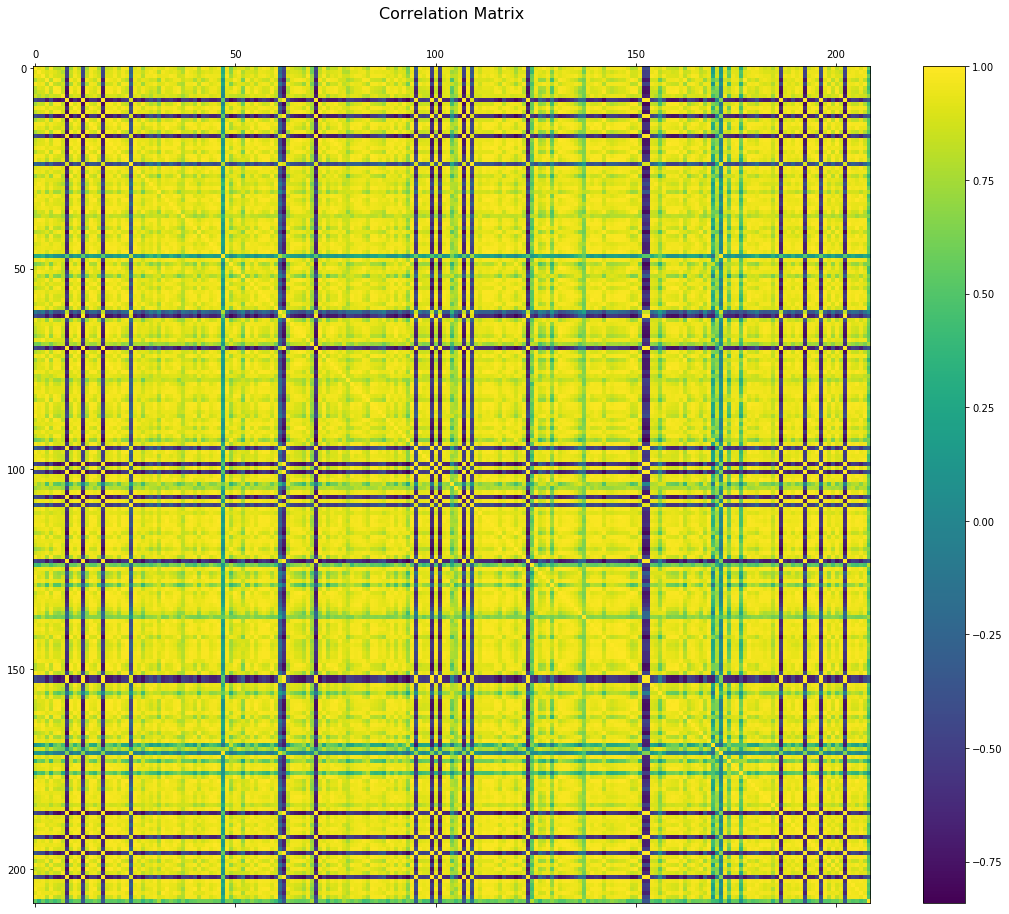

In [68]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pivoted_GDP_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We then try to clusterize this correlation matrix in order to find countries whose GDP are correlated:

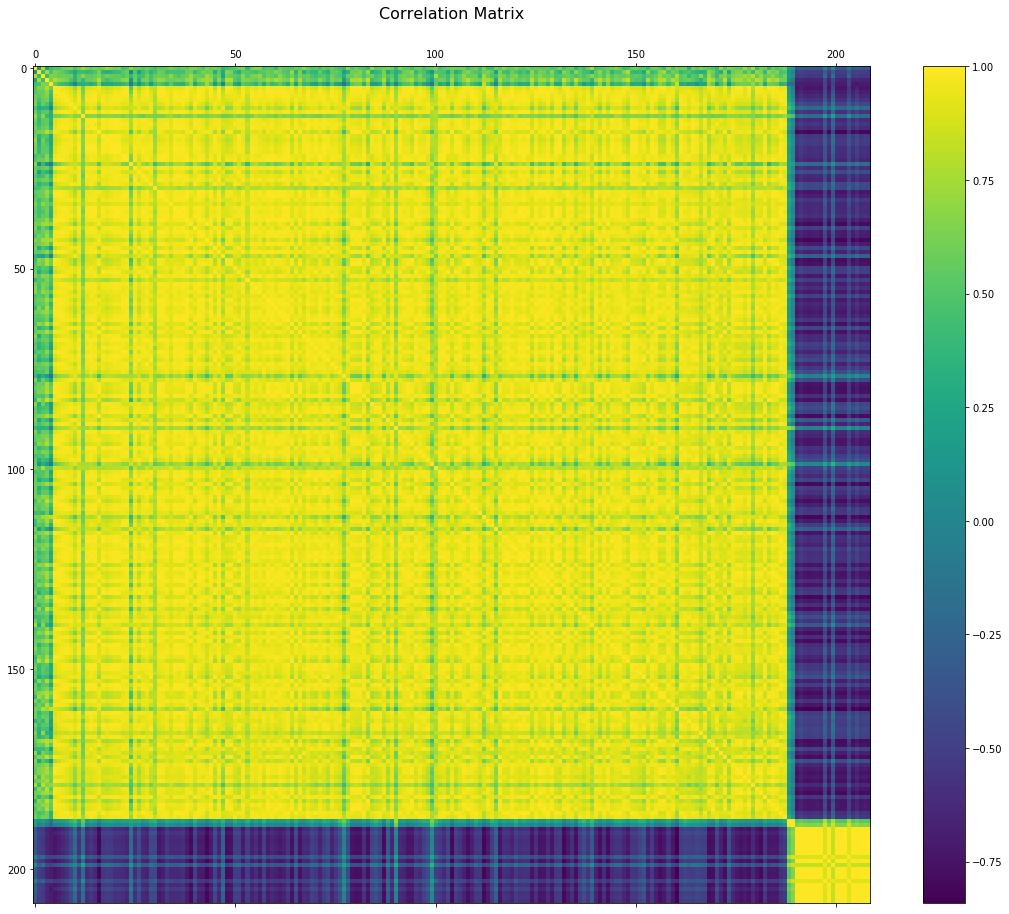

In [69]:
corr = pivoted_GDP_df.corr().values
pdist = spc.distance.pdist(corr)   # vector of ('55' choose 2) pairwise distances
linkage = spc.linkage(pdist, method='complete')
ind = spc.fcluster(linkage, 0.32*pdist.max(), 'distance')
columns = [pivoted_GDP_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
clusterised_df = pivoted_GDP_df.reindex(columns, axis=1)

f = plt.figure(figsize=(19, 15))
plt.matshow(clusterised_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We have found regions in which the GDP is highly correlated and between which the correlation coefficent is lower. We could refine the big clusters by iterating this method.

**Interpretation:** The correlation matrix of GDP contains lots of values that are very closed to one. This means that **GDP in two different countries have a trend to evolve the same way**. Therefore, we can say that the world countries have **strong enough trading relations** to make the GDP evolve the same way. The fact that we have found some **main clusters** could be interpreted as regions in which the **trading relations are more important**.

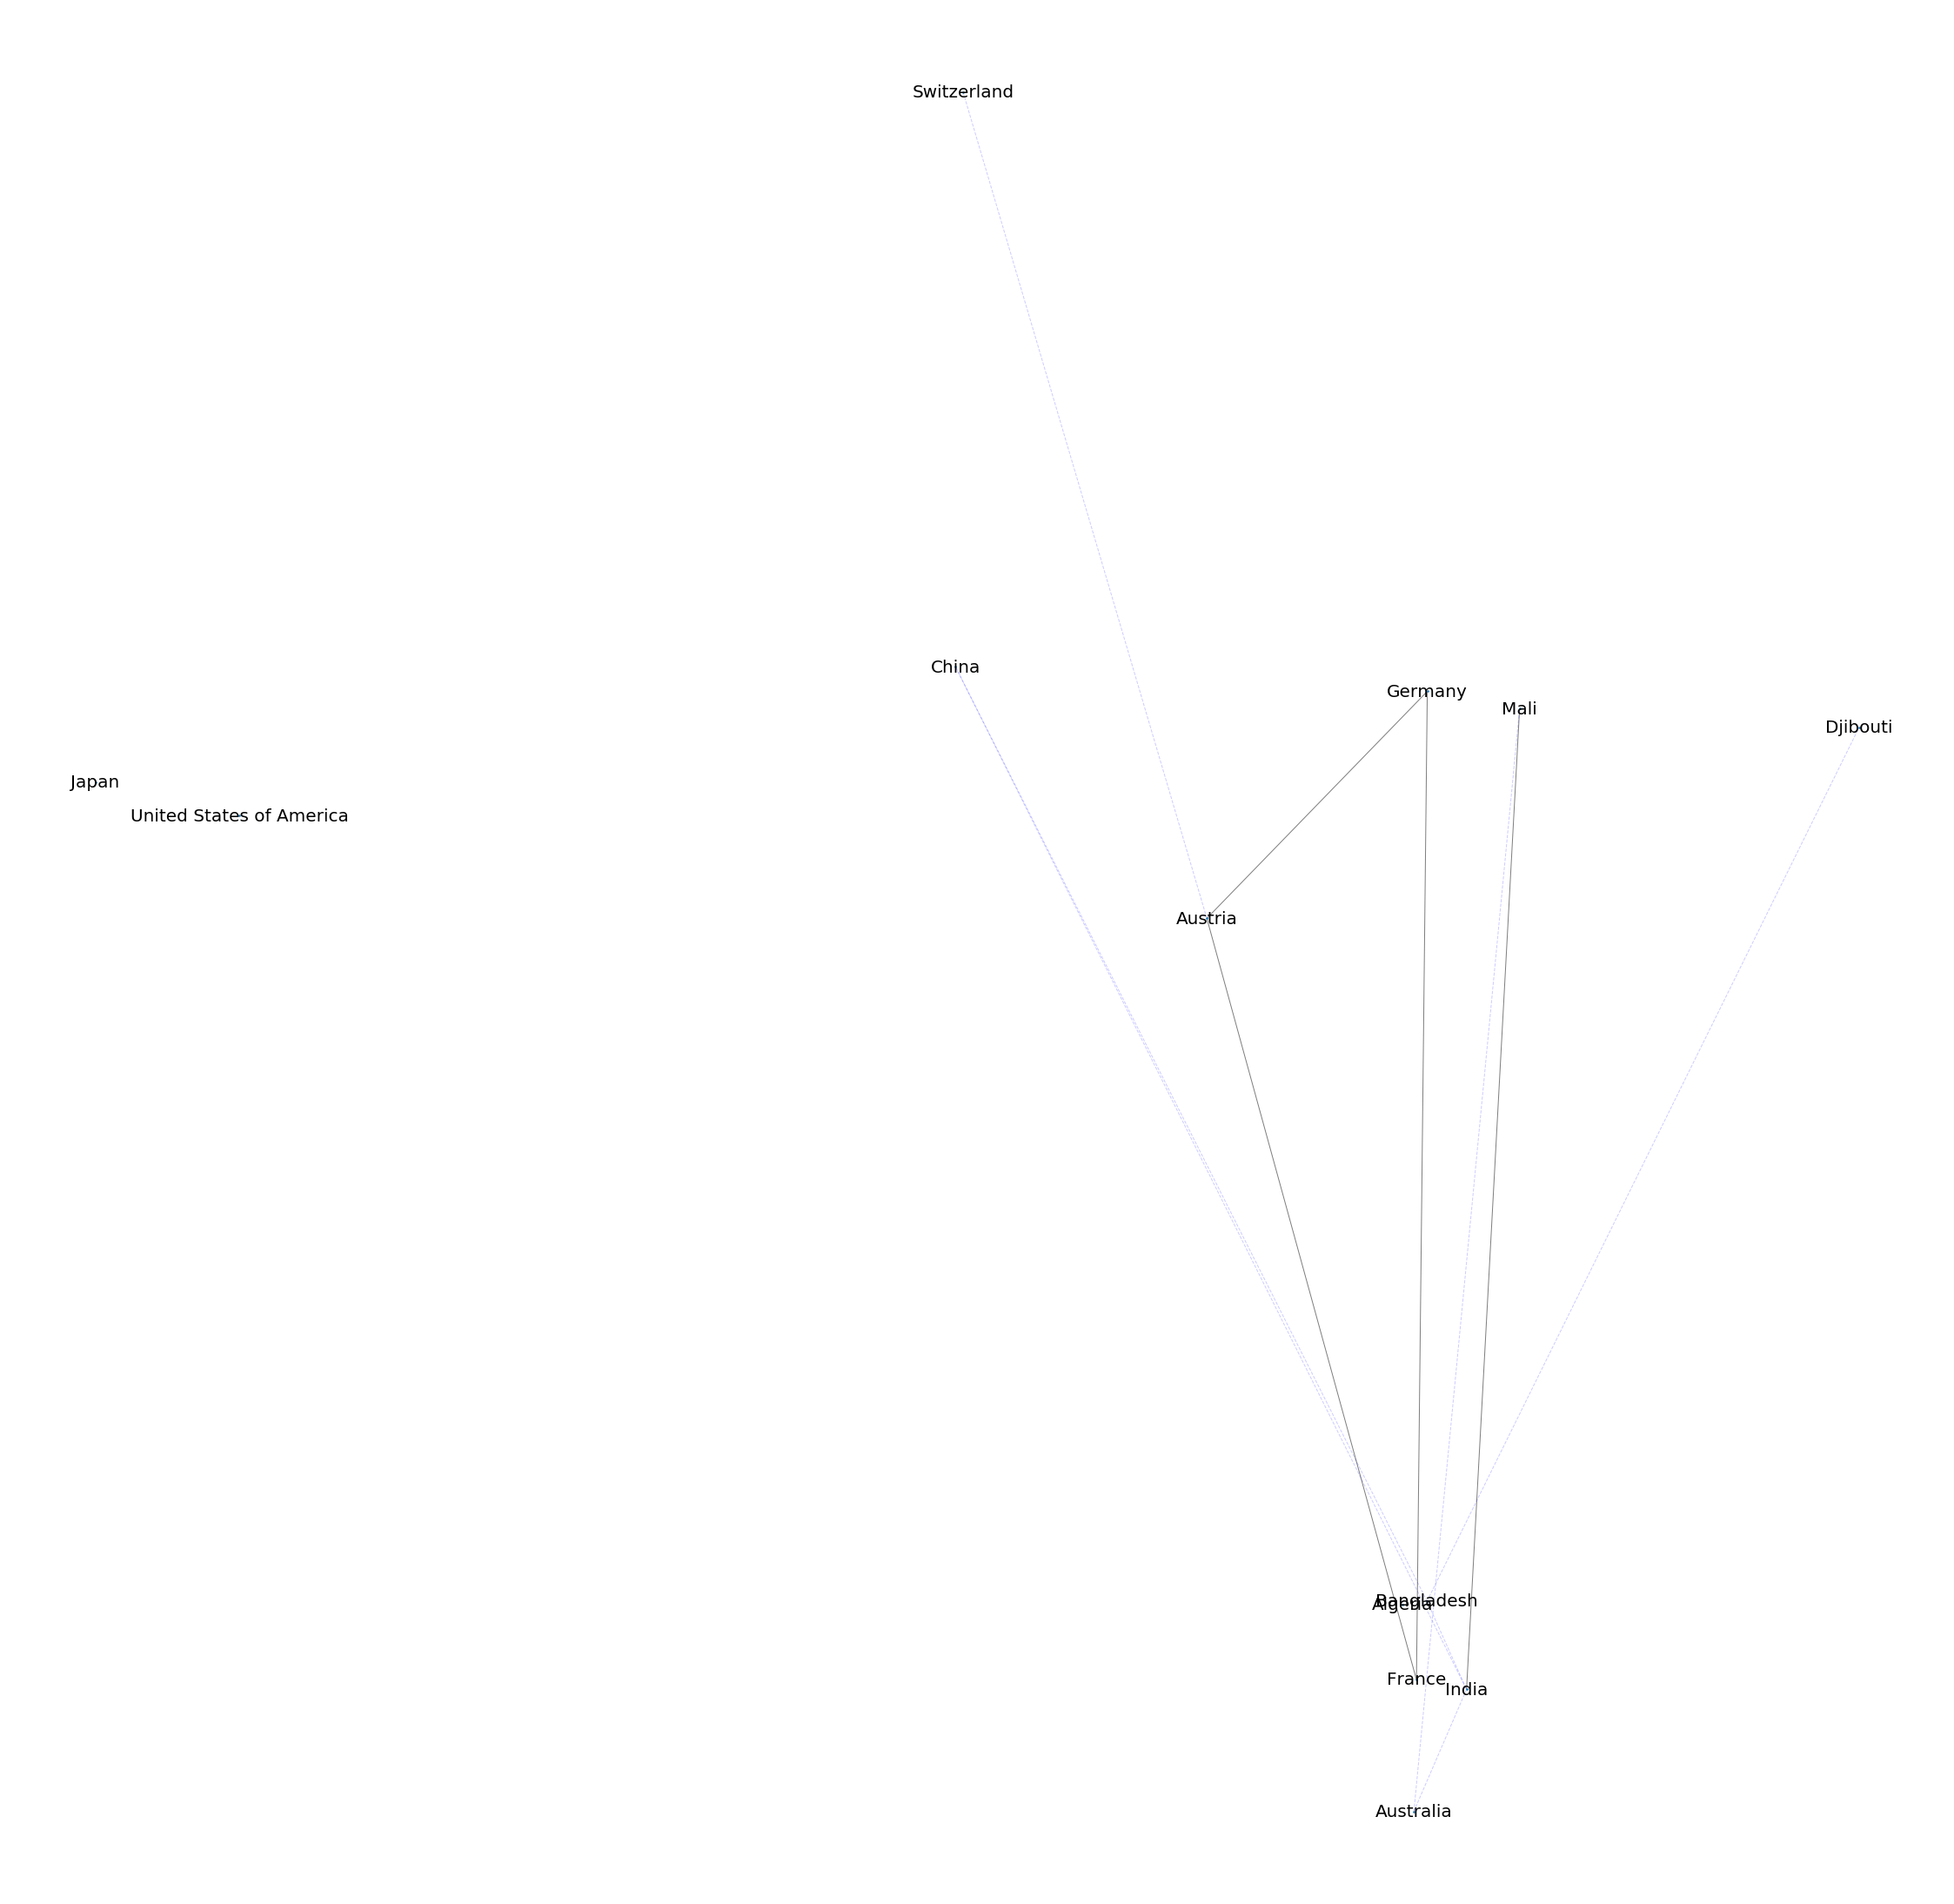

In [72]:
import networkx as nx


plt.figure(figsize=(40,40))

selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

G =  nx.from_pandas_adjacency(pivoted_GDP_df[selected_countries].corr())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.99]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.98 < d['weight'] <= 0.99]

pos = nx.spring_layout(G, k=0.01185)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_shape='.')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.2, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()


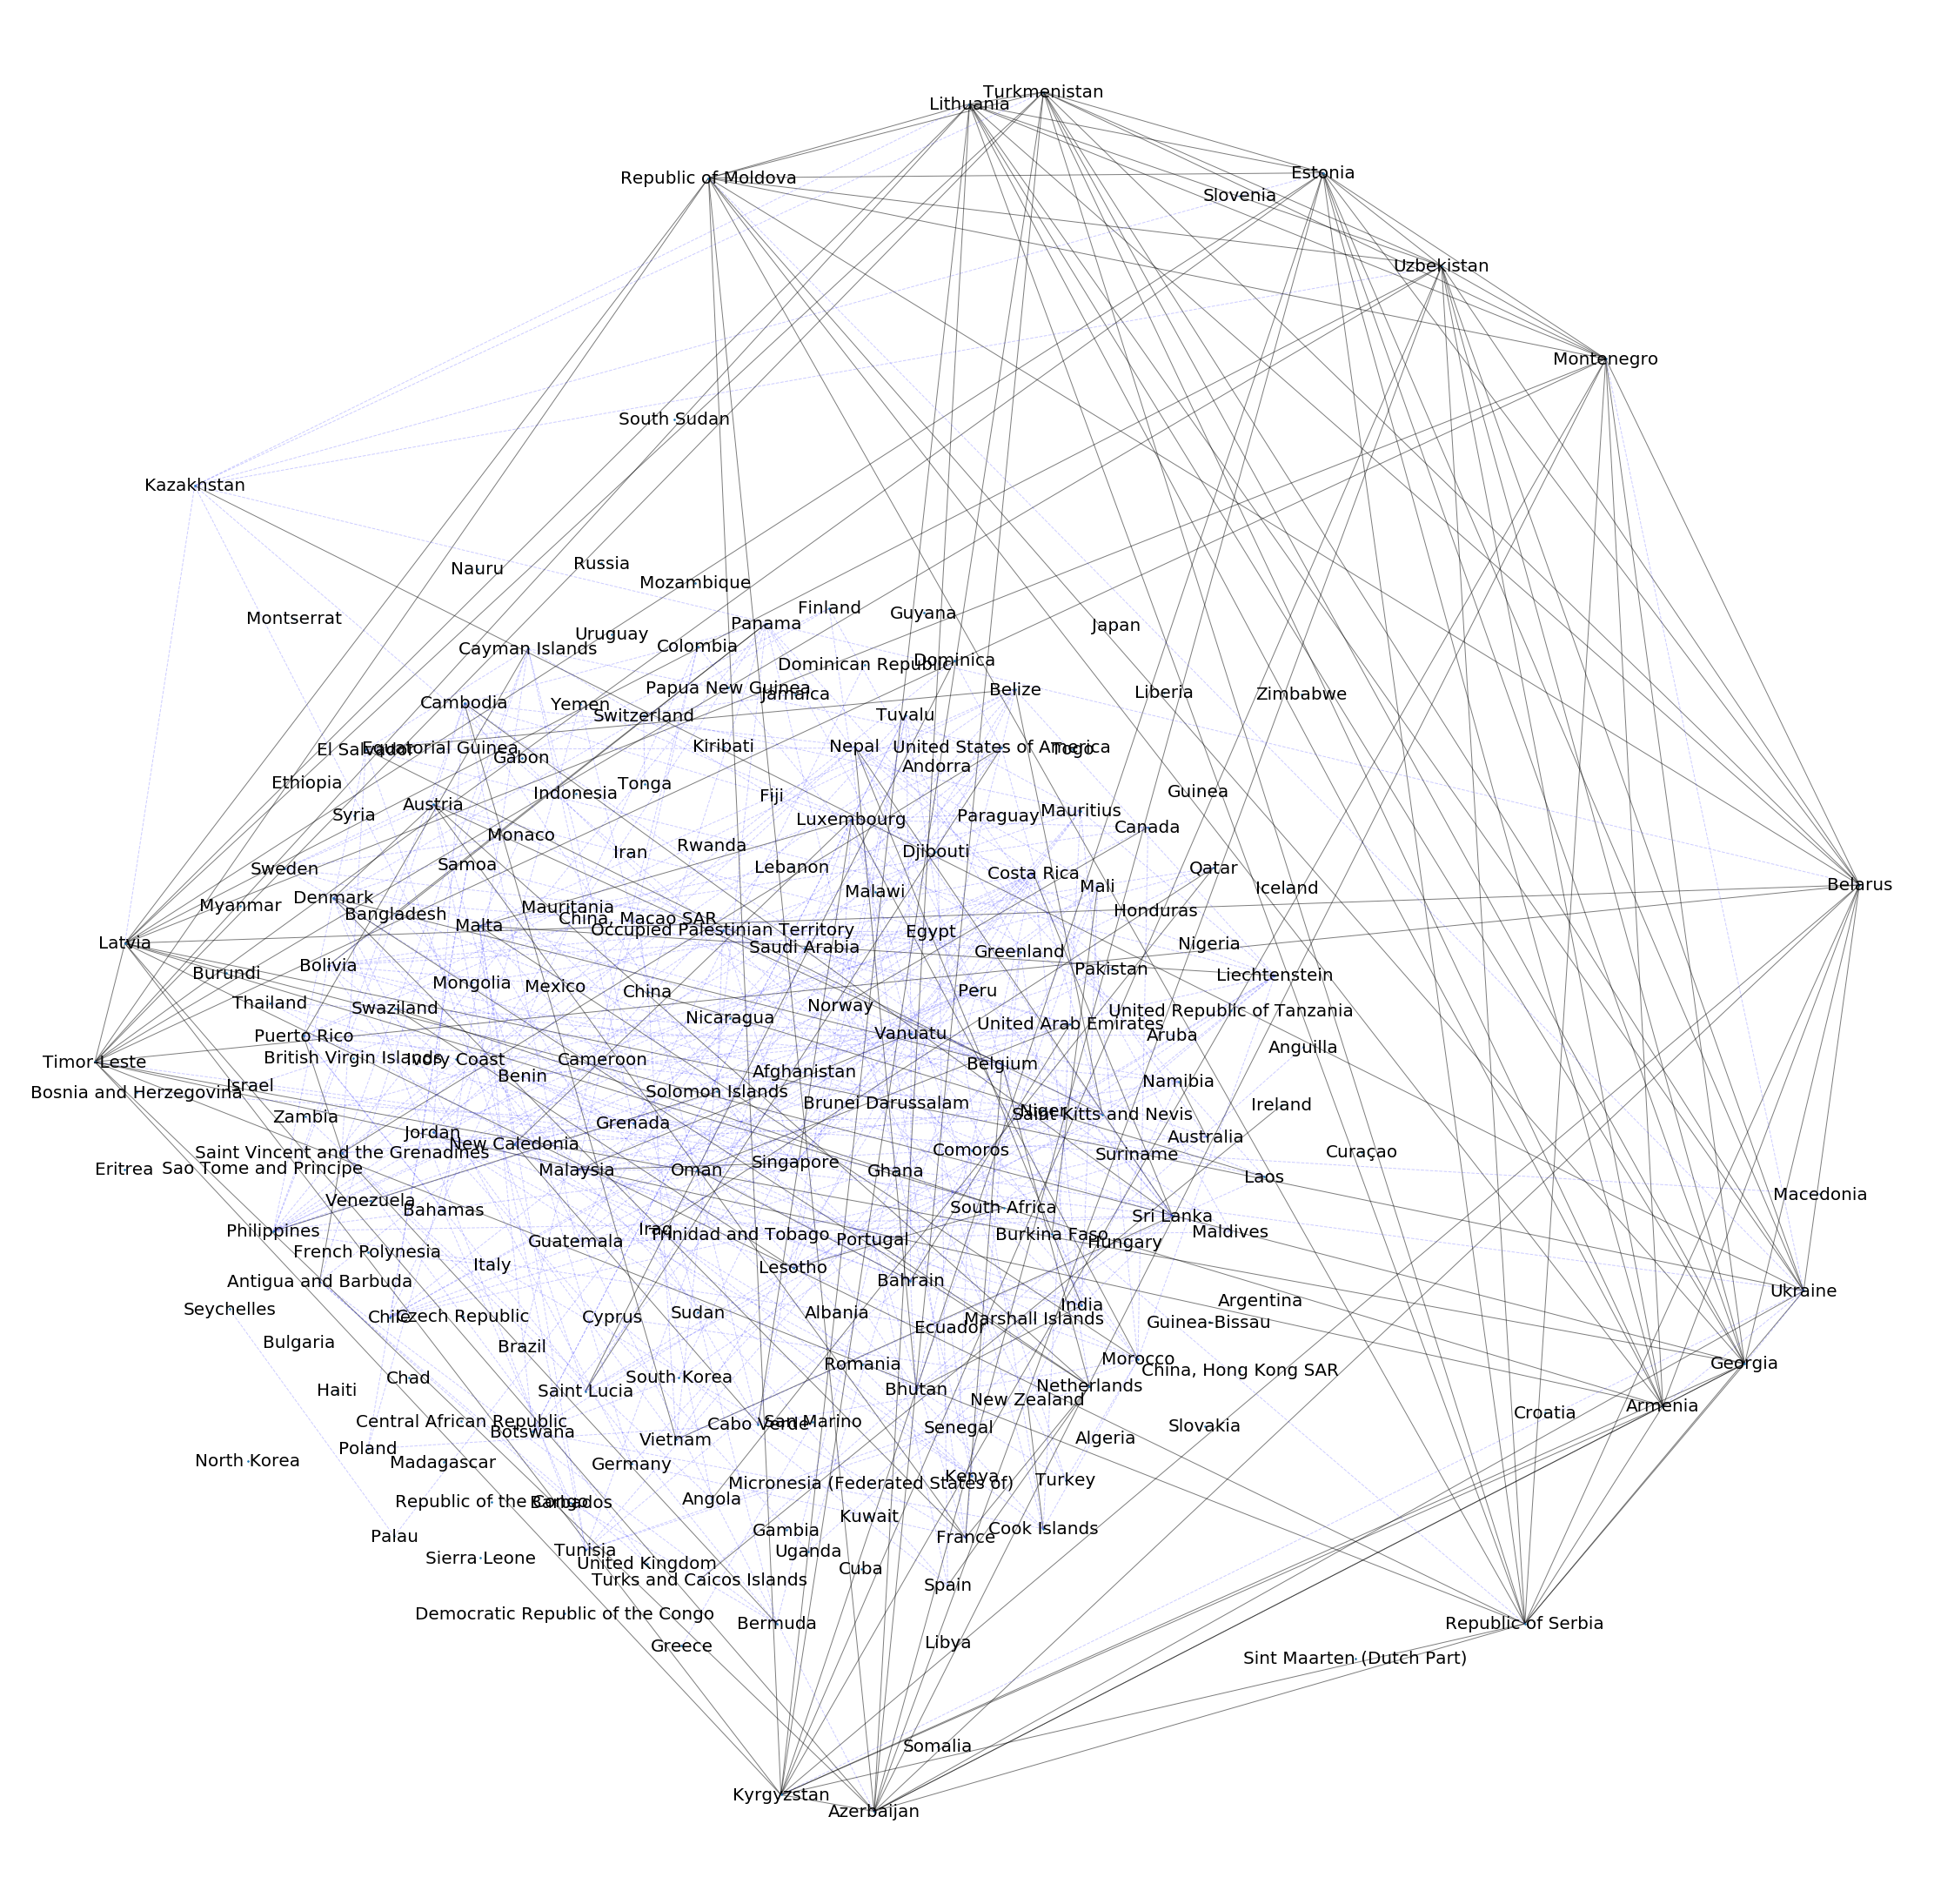

In [73]:
plt.figure(figsize=(40,40))

G =  nx.from_pandas_adjacency(pivoted_GDP_df.corr())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.995]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.99 < d['weight'] <= 0.995]

pos = nx.spring_layout(G, k=2)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_shape='.')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.2, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

#### 2.D. Economic classification of countries <a name="2D"></a>
Below, we plot the distribution of GDP over the world for the last decades:

In [74]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
interact(lambda x: visualise_world_data_folium(plot,'Value',x),x=(1990,2010,1))

//anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


interactive(children=(IntSlider(value=2000, description='x', max=2010, min=1990), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

The countries with high **GDP** indeed correpond to the most **developped countries**. The **trends we can observe** from those plots look **very significant** (USSR dissolution, China economic growth, ...)

# 3. Descriptive analysis <a name='3'></a>
3. 
    1. [Identifying the most important features](#3A)
        1. [Feature selection and model fiting](#3Aa)
        2. [Results](#3Ab)
    2. [Where are the most important features produced?](#3B)
    3. [Who are net importers and exporters of the features of interest?](#3C)
    4. [How is the self sufficiency distributed for the selected features?](#3D)
    

### A. Identifying the most important features<a name='3A'></a>

  a. Feature selection and mode fitting <a name='3Aa'></a>

In [75]:


def create_target_and_covariate_df(path_to_pkl):
    '''
    path_to_pkl: path to the pickle file.
    outputs two dataframes, one for the independant variables one for the dependant variables
    '''
    
    uni_df = pd.read_pickle(path_to_pkl)
    uni_df = uni_df.drop(columns=['Area', 'Year'])
    target_variables_df = uni_df[['(GDP, million $)', '(Consumer price indices, %)']]
    covariates_df = uni_df.drop(columns=['(GDP, million $)', '(Consumer price indices, %)'])
    
    return covariates_df, target_variables_df


def drop_feature_pearson_correlation(threshold, target_variable, target_variable_name, dataframe):
    
    '''
    threshold: the minimum amount of correlation required to keep the feature
    target_variable_name: string GDP or CPI
    normalised_dataset: the normalised dataset of feature
    target_variable: pandas series that contains the value of the target_varibale_name
    that we add to the normalised dataset
    
    '''
    copy_dataframe = dataframe.copy()
    copy_dataframe[target_variable_name] = target_variable
    cor = copy_dataframe.corr()
    cor_target = abs(cor[target_variable_name])
    
    relevant_features = cor_target[cor_target > threshold]
    
    return list(relevant_features.keys())

def drop_too_corelated_featues(threshold, dataframe):
    
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return dataframe.drop(dataframe[to_drop], axis=1)
    

def feature_augmentation(degree, covariates_df):
    poly = PolynomialFeatures(degree)
    output_nparray =  poly.fit_transform(covariates_df)

    
    output_df = pd.DataFrame(output_nparray, columns = poly.get_feature_names(covariates_df.columns))
    
    return output_df

def split_and_standardization_dataset(target_variables, covariates, test_size, random, type_return = 'numpy'  ):
    
    '''
    
    target_variables: pandas dataframe that contains the target variables
    covariates: pandas dataframe that contains the independant variables
    test_size: the proportion of the dataset to include in the test split
    type_return: 'numpy' if return numpy array, 'pandas' if return pandas dataframe
    '''
    target_variables_numpy = target_variables.to_numpy()
    covariates_numpy = covariates.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(covariates_numpy, target_variables_numpy, test_size=test_size, random_state = random)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    if type_return == 'numpy':
        
        return X_train_normalized, X_test_normalized, Y_train, Y_test
    
    elif type_return == 'pandas':
        
        X_test_normalized_df = pd.DataFrame(X_test_normalized, columns = list(covariates.columns))
        X_train_normalized_df = pd.DataFrame(X_train_normalized,columns= list(covariates.columns))
        Y_train_df = pd.DataFrame(Y_train, columns= list(target_variables.columns))
        Y_test_df = pd.DataFrame(Y_test, columns= list(target_variables.columns))
        
        return X_train_normalized_df, X_test_normalized_df, Y_train_df, Y_test_df

def fit_model_lasso(regularisation_parameters, covariates_df, target_df, nb_fold_CV):
    
    lasso = Lasso()
    
    parameters = {'alpha': regularisation_parameters}
    
    lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = nb_fold_CV)
    lasso_regressor.fit(covariates_df, target_df)

    best_param = lasso_regressor.best_params_['alpha']
    print('The best regularization parameter is ', best_param)


    lasso = Lasso(alpha=best_param)
    lasso.fit(covariates_df, target_df)
    return lasso.coef_
    
    
    
def RFECV_lasso_2(covariate, target,  random, nb_fold = 5,):
    
    cols = list(covariate.columns)
    X_train_, X_test_, Y_train_, Y_test_ = split_and_standardization_dataset(target, covariate, 0.2, type_return='numpy', random = random)
    #print('shape of Y_train_', Y_train_.shape, 'type of Y_train_', type(Y_train_))
    model = Lasso()
    
    rfecv = RFECV(estimator = model, step = 1, cv = nb_fold, scoring = 'neg_mean_squared_error')
    rfecv.fit(X_train_, np.ravel(Y_train_))
    print("Optimal number of features : %d" % rfecv.n_features_)
    
    temp = pd.Series(rfecv.support_,index = cols)
    selected_features = temp[temp==True].index

    print(selected_features)
    

    # plt.figure()
    # plt.xlabel("Number of features selected")
    # plt.ylabel("Cross validation score")
    # plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    # plt.show()
        
    return selected_features



    



In [76]:
def main(target_to_inspect = '(GDP, million $)'):

    RANDOM_SEED = 29
    
    reg_param = np.linspace(start = 0.01, stop= 1, num = 20)

    params = {

        'target' : target_to_inspect ,
        'name of target': 'GDP',
        'pearson correlation threshold': 0.4,
        'inter correlation threshold': 0.9, 
        'nb_fold_CV': 5, 
        'degree augmentation': 1
        'regularization_parameter': reg_param
    }

    covariates_df, target_variables_df = create_target_and_covariate_df('./Scripts/Data/uni_df.pkl')
    target_variables_df.to_pickle('target.pkl')

    ### Below we select the top 20 features in production:

    Production_cov_df = covariates_df.filter(regex= 'production|Production')
    summed_df = Production_cov_df.sum()
    keys = summed_df.keys()
    values = summed_df.values
    sorted_keys = [key for _,key in sorted(zip(values,keys))]
    Production_cov_df = Production_cov_df[sorted_keys[-20:]]
    selected_features_production = list(Production_cov_df.columns.values) # Selected features for top 20 prod features in volumne

    cropped_word_selected_prod = [" ".join(string.split()[:-3]) for string in selected_features_production] # Same as the list above with only the important words kept


    

   ### Below we are selecting the features in export that have been selected previously with the production
    export_df = covariates_df.filter(regex= 'export')
    

    columns_to_keep_export = []

    for column_export in list(export_df.columns.values):

        for columns_prod in cropped_word_selected_prod:

            if columns_prod in column_export:

                columns_to_keep_export.append(column_export)


    ### Below we are selecting the features in import that have been selected previously with the production
    import_df = covariates_df.filter(regex= 'import')
    

    columns_to_keep_import = []

    for column_import in list(import_df.columns.values):

        for columns_prod in cropped_word_selected_prod:

            if columns_prod in column_import:

                columns_to_keep_import.append(column_import)

    


    final_features_kept = selected_features_production + columns_to_keep_export + columns_to_keep_import  # All the selected features
   
    covariates_df = covariates_df[final_features_kept]
    


    list_selected_features_GDP = drop_feature_pearson_correlation(params['pearson correlation threshold'], target_variables_df[params['target']], params['name of target'], covariates_df)
    covariate_reduced_df = covariates_df[list_selected_features_GDP[:-1]]
    covariate_reduced_df = drop_too_corelated_featues(params['inter correlation threshold'], covariate_reduced_df)
    covariate_reduced_df.to_pickle("reduced_df_2.pkl")
    print('list of selected features after reduction', list(covariate_reduced_df.columns.values))
    
    regularisation_parameters = params['regularization_parameter']

    target_df = target_variables_df[params['target']]

    nb_fold_CV = params['nb_fold_CV']

    param_lasso = fit_model_lasso(regularisation_parameters, covariate_reduced_df, target_df, nb_fold_CV = nb_fold_CV )

    keys = list(covariate_reduced_df.columns.values)
    
    values = param_lasso
   
    return dict(zip(keys, values))

weights=main('(GDP, million $)')

SyntaxError: invalid syntax (<ipython-input-76-7b759510669f>, line 13)

In [ ]:
weights

**Above, we see the features identified as the most important by our regression model**

We find that the  goods that most influence the GDP are soybean, tomatoes, Maize, Wheat , Cattle live animals and pigs amongst other. 

It is an interesting result that is easily understandable. Take soybean for example. This crop is one of the most produced. The mains exporter are the US, Brasil and Argentina and the main importer is China. Around 330 millions tonnes of soybean was produced in 2018. It is vastly used to feed animals. It is thus coherent to see such an important good be selected by our model. We see also that wheat, oats, cattle live and pigs are present. This again is easily understandable. It is sufficient to look at our eating habit to convince ourself that those goods plays an important role in the GDP. 

## B. Where are the most important features produced? <a name='3B'></a>

After having identified the most important features with our prediction model, we want to have a look as to where they are produced.  

The first step is to select to columns corresponding to the production of the features of interest within our dataframe.

In [77]:
features=list(weights.keys())
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
df=df.set_index(['Area','Year'])

#To select the production of the features of interest, the dataframe is filtered with each feature. To reduce computation cost, the result is stored in a dictionnary and when all the features are treated turned into
#a pandas DataFrame

dic_to_plot={}

for feature in features:
    
    if 'Production' in feature or 'production' in feature:
        if len(df.filter(regex=feature).columns)==0:
            print('{} not found'.format(c))
        else:
            dic_to_plot.update(df.filter(regex=feature).to_dict())
            
    else:
        s=re.split(' Food| Live',feature)[0]
        cols=[c for c in df.columns if re.split(' Crop| Food| Live',c)[0]==s and re.search('Production|production',c)]
        
        if cols==0:
            print('{} not found'.format(feature))
        else:
            dic_to_plot.update(df[cols].to_dict())
            
prod_to_plot=pd.DataFrame(dic_to_plot)
prod_to_plot=prod_to_plot.reset_index().rename(columns={'level_0':'Area','level_1':'Year'})

NameError: name 'weights' is not defined

#### Let's dive into the maps!

In [ ]:
columns=[c for c in prod_to_plot.columns if c!='Area' and c!='Year']
for c in columns:
    print(c)
    display(interact(lambda x : visualise_world_data_folium(prod_to_plot,c,x,log2=True),x=(1970,2014,1)))


### TODO: Analysis (Julien)

In [78]:
#Exporting the results as HTML files
import os
import shutil

#Generate result files

#if needed, creating result directory
if not os.path.exists('./Scripts/Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
if not os.path.exists('./Scripts/Data/ResultsJulien/Producers'):
        os.mkdir('./Scripts/Data/ResultsJulien/Producers')
        
for c in prod_to_plot.columns:
    if c!='Year' and c!='Area':
        
        #if the dir already exists, remove it and create fresh one
        if os.path.exists('./Scripts/Data/ResultsJulien/Producers/{}'.format(c)):
            shutil.rmtree('./Scripts/Data/ResultsJulien/Producers/{}'.format(c))
        #wait for the deletion to be complete
        while os.path.exists('./Scripts/Data/ResultsJulien/Producers/{}'.format(c)):
            continue
        os.mkdir('./Scripts/Data/ResultsJulien/Producers/{}'.format(c))
        
        for year in range(1970,2015,1):
            m=visualise_world_data_folium(prod_to_plot,c,year,log2=True)
            save_name='./Scripts/Data/ResultsJulien/Producers/{}/{}_{}.html'.format(c,c,year)
            m.save(save_name)

NameError: name 'prod_to_plot' is not defined

## C.  Who are the importers and exporters of the features of interest? <a name="3C"></a>

For the next milestone, this part will be put to the end of the file and conducted for **specific agricultural features** (e.g. trade of crop most highly correlated to GDP) after the **most important ones** have been **identified**.

In [79]:
#exported items
exports_df_mass = uni_df.filter(like='export quantities tonnes')
exports_df_head = uni_df.filter(like='export quantities Head')

#imported items
imports_df_mass = uni_df.filter(like='import quantities tonnes')
imports_df_head = uni_df.filter(like='import quantities Head')

In [80]:
def plot_map_import_export(imported_and_exported_elt):
    if imported_and_exported_elt+' Food export quantities tonnes' in list(exports_df_mass):
        exp = imported_and_exported_elt+' Food export quantities tonnes'
        imp = imported_and_exported_elt+' Food import quantities tonnes'
        net_df = pd.concat([uni_df[['Area','Year']],exports_df_mass[exp],imports_df_mass[imp]], axis=1)
    if imported_and_exported_elt+' Live animals export quantities Head' in list(exports_df_head):
        exp = imported_and_exported_elt+' Live animals export quantities Head'
        imp = imported_and_exported_elt+' Live animals import quantities Head'
        net_df = pd.concat([uni_df[['Area','Year']],exports_df_head[exp],imports_df_head[imp]], axis=1)
    net_df["Value"] = net_df[exp]-net_df[imp]
    net_df["Value"] = np.sign(net_df["Value"]) * np.log(np.abs(net_df["Value"]) + 1) # kind of log scale positive and negative values
    for year in range(1980, 2015, 5):
        display(year, visualise_world_data_folium(net_df, 'Value', year, False, True))

In [ ]:
plot_map_import_export('Apples')

In [ ]:
plot_map_import_export('Grapes')

In [ ]:
plot_map_import_export('Wheat')

In [ ]:
plot_map_import_export('Soybeans')

In [ ]:
plot_map_import_export('Maize')

In [ ]:
plot_map_import_export('Turkeys')

## D. How is the self sufficiency distributed for the selected features? <a name="3D"></a>
In this chapter, we take a look at the self suficiency score of the countries around the world and we focus on the agricultural features identified by our model.

In [71]:
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
sc=compute_self_suficiency(df,weights)
sc.reset_index(inplace=True)
sc=sc.rename(columns={'level_0':'Area','level_1':'Year'})

NameError: name 'weights' is not defined

In [ ]:
interact(lambda x: visualise_world_data_folium(sc,'Agg',x,log2=True),x=(1970,2015))

In [ ]:
# This field generates the results and exports them as HTML files (1 map per year)

import os
import shutil

#Generate result files

#if needed, create result directories
if not os.path.exists('./Scripts//Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
    
#if directory already exists delete it
if os.path.exists('./Scripts/Data/ResultsJulien/SelfSufficiency'):
    shutil.rmtree('./Scripts/Data/ResultsJulien/SelfSufficiency')

#While loop necessary to wait until the tree is deleted
while os.path.exists('./Scripts/Data/ResultsJulien/SelfSufficiency'):
    continue
    
os.mkdir('./Scripts/Data/ResultsJulien/SelfSufficiency')
    

for year in range(1970,2016,1):
            m=visualise_world_data_folium(sc,'Agg',year,log2=True)
            save_name='./Scripts/Data/ResultsJulien/SelfSufficiency/self_suf_{}.html'.format(year)
            m.save(save_name)




# TO DELETE




### 4. Informed plan for next actions  <a name="4"></a>

With **clean dataframes** we can now really focus on **producing some interesting results**. Our initial idea was to observe the **effects of different crops and food items on the economic growth** of the countries as well as the **differences in self-sufficiency**. Along the exploration of the data, we turned our attention toward prediction models. Training a **Ridge model** on our data will allow us to identify the **agricultural products** that are the **most correlated** with the **economic growth** of countries (predict the GDP based on agricultural features). The second model (prediction of the CPI variation rate) will allow us to identify **products linked with economic stability**.  

The identification of such items would give an **interesting insight toward understanding geopolotical strategies and challenges**. Further insight might be gained by identifying **who** the producers of these "economically strong" crops and animal products are and visualising the **geographical repartition of the most important ressources**. 

Our objectives for the following weeks are:
1. Revise the order of analysis - for instance putting net food exporters and importers at the end of the notebook. 
2. Fine tune our machine learning models by finding satisfying and meaningful ways to normalise the data without introducing bias, by doing a meaningful parameter optimisation and by removing aggregation variables such as "Rice-total".
3. Identify the "strong" agricultural products.
4. Find a clean way to calculate price stability with the given CPI values.
5. Create a model for price stability and correlating it to different agricultural products.
6. Identify the products we want to use for the self-sufficiency calculation.
7. Compute the correlation between price stability and self-sufficiency.
8. Visualise the repartition of the production of "strong" products as well as their trading flow (who buys, who sells).
9. Share our results in the form of a data story.